## Customer Segmentation Analysis for Targeted Marketing

### **Overview**

A retail company is currently experiencing difficulties in effectively targeting its marketing campaigns. Without a clear understanding of customer behavior and characteristics, marketing efforts risk being inefficient and poorly directed.

This notebook aims to conduct a **comprehensive customer segmentation analysis** using the company’s available customer data. By applying unsupervised learning techniques such as **KMeans**, **DBSCAN**, and **Hierarchical Clustering**, I will uncover distinct customer groups based on their purchasing behavior and demographic attributes.

### **Goals of This Analysis**
- Identify **natural groupings** among customers.
- Enable **personalized marketing strategies** tailored to each segment.
- Help the business achieve:
  -  Enhanced customer engagement  
  -  Increased sales  
  -  Optimized marketing expenditures  

Through this analysis, the company can transition from a one-size-fits-all approach to a **data-driven, targeted marketing strategy**.


## Task 1 – The Data

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

from pca import pca
from sklearn.cluster import DBSCAN
from datetime import date
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import gower
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score

In [2]:
raw_data = pd.read_csv("marketing_campaign.csv",sep= "\t") #Reads the raw data
raw_data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
raw_data["MntGoldProds"].min(), raw_data["MntGoldProds"].max() #Checks the range of the ID column

(np.int64(0), np.int64(362))

### **Dataset Description**
The data was sourced from kaggle "https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data"

The dataset contains detailed information about individual customers and their interaction with a company, covering demographics, purchasing behavior, and marketing engagement. The attributes can be grouped into the following categories:

#### **People**
- **ID**: A unique identifier for each customer.
- **Year_Birth**: The year the customer was born (e.g., 1980).
- **Education**: The customer's highest education level (e.g., Graduation, PhD).
- **Marital_Status**: The customer's marital status (e.g., Single, Married).
- **Income**: The customer's yearly household income, in monetary units.
- **Kidhome**: Number of children in the customer's household.
- **Teenhome**: Number of teenagers in the customer's household.
- **Dt_Customer**: The date when the customer enrolled with the company.
- **Recency**: Number of days since the customer's last purchase.
- **Complain**: Whether the customer has lodged a complaint in the last 2 years (1 = Yes, 0 = No).

#### **Products**
- **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**: Amount (in monetary units) the customer has spent on each product category in the past 2 years.

#### **Promotions**
- **NumDealsPurchases**: Total purchases made using discounts.
- **AcceptedCmp1–5**: Whether the customer accepted the offer in each of the 1st to 5th marketing campaigns (1 = Yes, 0 = No).
- **Response**: Whether the customer accepted the offer in the most recent campaign.

#### **Place**
- **NumWebPurchases**: Number of purchases made online.
- **NumCatalogPurchases**: Number of purchases made using catalogs.
- **NumStorePurchases**: Number of purchases made in physical stores.
- **NumWebVisitsMonth**: Number of website visits in the last month.

The dataset contains both numerical and categorical features, and the values are either integers, floats (monetary amounts), or categories/strings. 


**Explain how the dataset is suitable for the pitched project:**


The dataset is well-suited for the objectives of this project, which involve analyzing customer behavior and segmenting customers for more targeted marketing strategies. It provides a comprehensive view of each customer by combining:

- **Demographic attributes** such as birth year, education level, marital status, and household composition (children and teenagers),
- **Economic data**, including yearly household income,
- **Behavioral information**, such as the amount spent on different product categories over the past two years,
- **Engagement with promotions**, including responses to various marketing campaigns,
- **Interaction channels**, such as web, catalog, and in-store purchases, as well as website visit frequency.

This rich and multi-dimensional structure allows for meaningful analysis through clustering, dimensionality reduction, and statistical exploration. It supports the identification of customer segments with shared traits or behaviors, helping the organization optimize its marketing efforts, improve customer targeting, and enhance overall business performance.


## Task 2 – Initial Data Analysis

In [4]:
raw_data.count()#Checks the completeness of the data

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [5]:
raw_data.describe()#Describes the data

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [6]:
print(f" The data set contains the information of {raw_data.shape[0]} customers and {raw_data.shape[1]} attributes")

 The data set contains the information of 2240 customers and 29 attributes


In [7]:
raw_data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [8]:
raw_data.isna().sum()#Checks the missing values in the data


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
#Scatter plot between Income and product-related features like MntWines, MntMeatProducts, MntGoldProds.
spending_features = ["MntWines", "MntMeatProducts", "MntGoldProds"]

sns.pairplot(raw_data, vars=spending_features + ["Income"])
plt.show()

### **Initial Data Analysis: Pairplot of Key Features**

The pairplot above visualizes the pairwise relationships and distributions among four key quantitative variables in the dataset:

- `MntWines`: Amount spent on wine products
- `MntMeatProducts`: Amount spent on meat products
- `MntGoldProds`: Amount spent on gold products
- `Income`: Reported household income

#### Key Observations:

1. **Distribution Plots (Diagonals):**
   - The diagonal histograms show that all spending variables (`MntWines`, `MntMeatProducts`, and `MntGoldProds`) are **right-skewed**, indicating that most customers spend small amounts, while a few spend significantly more.
   - `Income` also shows a strong **right-skew**, with some extreme outliers exceeding 600,000.

2. **Scatter Plots (Lower Triangle):**
   - **Positive trends** can be noticed between spending on different product categories (e.g., wine vs. meat), suggesting that high spenders tend to spend across multiple categories.
   - The relationship between **`Income` and spending** is not very linear or strong. This may imply that **income alone doesn’t fully explain purchasing behavior**.
   - Some scatter plots reveal distinct **clusters or horizontal bands**, especially in `Income`, which could be due to income brackets or reporting artifacts.

3. **Outliers:**
   - The presence of a few extreme values, especially in `Income`, is evident and may influence scaling or clustering algorithms. These might need to be addressed (e.g., removed or transformed).



In [10]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
raw_data[product_columns].sum().plot(kind='bar')
plt.title("Total Spending per Product Category")


Text(0.5, 1.0, 'Total Spending per Product Category')


### Total Spending per Product Category

This bar chart displays the total spending per product category across all customers.

#### Observations:
- **Wines (`MntWines`)** have the highest total spending by a large margin, indicating strong consumer preference or higher product prices.
- **Meat products (`MntMeatProducts`)** are the second most purchased category, showing significant demand.
- **Gold products (`MntGoldProds`)** also show relatively high spending, possibly due to their higher individual cost or popularity as luxury gifts.
- Spending on **Fish**, **Fruits**, and **Sweet Products** is noticeably lower in comparison, suggesting these categories may either be less prioritized by consumers or involve smaller purchase amounts.

#### Insights:
- Marketing efforts could focus more on wine and meat products, as they appear to be key revenue drivers.
- Categories like **Fruits** and **Sweet Products** may benefit from promotional strategies to boost sales.

Text(0.5, 1.0, 'Number of people that responded to each market campaign')

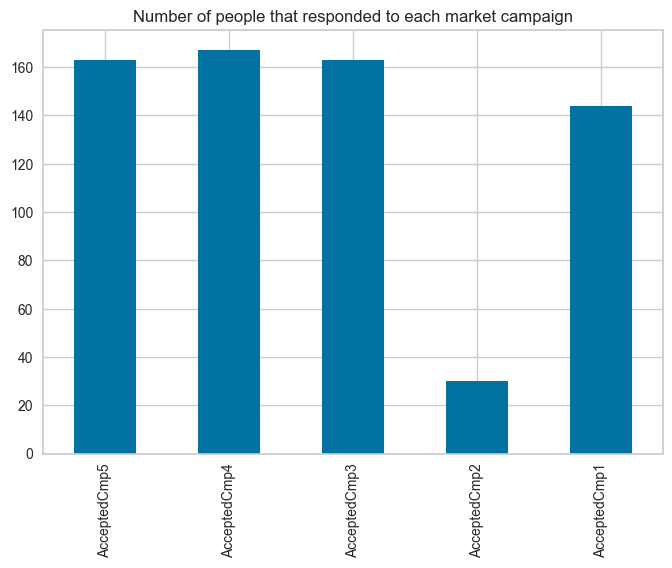

In [11]:
raw_data[["AcceptedCmp5","AcceptedCmp4",	"AcceptedCmp3",	"AcceptedCmp2","AcceptedCmp1"]].sum().plot(kind="bar")
plt.title("Number of people that responded to each market campaign")

### Response Count per Marketing Campaign

This bar chart shows the number of customers who responded positively to each of the five marketing campaigns (`AcceptedCmp1` to `AcceptedCmp5`).

#### Observations:
- **Campaigns 3, 4, and 5** had the highest response rates, with over 160 responses each.
- **Campaign 1** also performed fairly well with around 145 responses.
- **Campaign 2** had significantly fewer responses (only about 30), making it the least successful campaign.

#### Insights:
- Campaigns **Cmp3–Cmp5** were the most effective and could serve as benchmarks for future marketing strategies.
- The low response to **Cmp2** suggests potential issues such as poor targeting, timing, or messaging.



## Task 3 – Preprocessing

In [12]:
data = raw_data.copy()


In [13]:
data = data.dropna(subset=['Income'])# Drops the rows with missing values in the 'Income' column
data=data[data['Income']<120000]# Drop the outlier in the 'Income' column

In [14]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)# Converts the 'Dt_Customer' column to datetime format
data["Age"] = 2025 - data["Year_Birth"]# Creates a new column 'Age' by subtracting the 'Year_Birth' from 2025. This makes the year of bith a quantitative variable
data.drop(columns=["Year_Birth"], inplace=True)# Drops the 'Year_Birth' column


In [15]:
data.head(10)

ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0  2012-09-04   
1  2174  Graduation         Single  46344.0        1         1  2014-03-08   
2  4141  Graduation       Together  71613.0        0         0  2013-08-21   
3  6182  Graduation       Together  26646.0        1         0  2014-02-10   
4  5324         PhD        Married  58293.0        1         0  2014-01-19   
5  7446      Master       Together  62513.0        0         1  2013-09-09   
6   965  Graduation       Divorced  55635.0        0         1  2012-11-13   
7  6177         PhD        Married  33454.0        1         0  2013-05-08   
8  4855         PhD       Together  30351.0        1         0  2013-06-06   
9  5899         PhD       Together   5648.0        1         1  2014-03-13   

   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   
5       16       520         42  ...             0             0   
6       34       235         65  ...             0             0   
7       32        76         10  ...             0             0   
8       19        14          0  ...             0             0   
9       68        28          0  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   
5             0             0             0         0              3   
6             0             0             0         0              3   
7             0             0             0         0              3   
8             0             0             0         0              3   
9             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   68  
1         11         0   71  
2         11         0   60  
3         11         0   41  
4         11         0   44  
5         11         0   58  
6         11         0   54  
7         11         0   40  
8         11         1   51  
9         11         0   75  

[10 rows x 29 columns]

In [16]:
# Find out the different variables in the education column
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
data["Education"].value_counts()

Education
Graduation    1113
PhD            477
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [18]:
# regularize their education level to "high_school", "Undergraduate", "Master" and "PhD"
data['Education']=data['Education'].replace({"Basic":"high_school","2n Cycle":"Master","Graduation":"Undergraduate"})

One-hot encoding is a method used to convert categorical variables (especially nominal variables with no intrinsic order) into a numerical format that can be provided to machine learning algorithms.

In [19]:
education_dummies = pd.get_dummies(data["Education"], prefix="Edu").astype(int)# Creates dummy variables for the 'Education' column
# The prefix "Edu" is added to the dummy variable names
data = pd.concat([data, education_dummies], axis=1)# Concatenates the dummy variables to the original data
data = data.drop("Education", axis=1)# Drops the original 'Education' column



In [20]:
#Regularize the marital status to single and together
data["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    569
Single      471
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [21]:
data['Marital_Status']=data['Marital_Status'].replace({"Married":"Together","Divorced":"Single","Widow":"Single", "Alone":"Single"})

In [22]:
data = data[~data["Marital_Status"].isin(["Absurd", "YOLO"])]# Drop the rows with 'Absurd' and 'YOLO' in the 'Marital_Status' column
data

ID Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524         Single  58138.0        0         0  2012-09-04       58   
1      2174         Single  46344.0        1         1  2014-03-08       38   
2      4141       Together  71613.0        0         0  2013-08-21       26   
3      6182       Together  26646.0        1         0  2014-02-10       26   
4      5324       Together  58293.0        1         0  2014-01-19       94   
...     ...            ...      ...      ...       ...         ...      ...   
2235  10870       Together  61223.0        0         1  2013-06-13       46   
2236   4001       Together  64014.0        2         1  2014-06-10       56   
2237   7270         Single  56981.0        0         0  2014-01-25       91   
2238   8235       Together  69245.0        0         1  2014-01-24        8   
2239   9405       Together  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  Complain  \
0          635         88              546  ...             0         0   
1           11          1                6  ...             0         0   
2          426         49              127  ...             0         0   
3           11          4               20  ...             0         0   
4          173         43              118  ...             0         0   
...        ...        ...              ...  ...           ...       ...   
2235       709         43              182  ...             0         0   
2236       406          0               30  ...             0         0   
2237       908         48              217  ...             0         0   
2238       428         30              214  ...             0         0   
2239        84          3               61  ...             0         0   

      Z_CostContact  Z_Revenue  Response  Age  Edu_Master  Edu_PhD  \
0                 3         11         1   68           0        0   
1                 3         11         0   71           0        0   
2                 3         11         0   60           0        0   
3                 3         11         0   41           0        0   
4                 3         11         0   44           0        1   
...             ...        ...       ...  ...         ...      ...   
2235              3         11         0   58           0        0   
2236              3         11         0   79           0        1   
2237              3         11         0   44           0        0   
2238              3         11         0   69           1        0   
2239              3         11         1   71           0        1   

      Edu_Undergraduate  Edu_high_school  
0                     1                0  
1                     1                0  
2                     1                0  
3                     1                0  
4                     0                0  
...                 ...              ...  
2235                  1                0  
2236                  0                0  
2237                  1                0  
2238                  0                0  
2239                  0                0  

[2204 rows x 32 columns]

In [23]:
#one-hot encoding for the 'Marital_Status' column
# Creates dummy variables for the 'Marital_Status' column
marital_dummies = pd.get_dummies(data["Marital_Status"], prefix="Mar").astype(int)
data = pd.concat([data, marital_dummies], axis=1)
data = data.drop("Marital_Status", axis=1)

In [24]:
#convert 'Dt_Customer' column to numerical variable
last_date = date(2025,5, 4)
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30.
data['Seniority'] = data['Seniority'].round(0).astype(int)
# Drop the non-numeric  datetime column
data = data.drop(columns=['Dt_Customer'])

In [25]:
data

ID   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      5524  58138.0        0         0       58       635         88   
1      2174  46344.0        1         1       38        11          1   
2      4141  71613.0        0         0       26       426         49   
3      6182  26646.0        1         0       26        11          4   
4      5324  58293.0        1         0       94       173         43   
...     ...      ...      ...       ...      ...       ...        ...   
2235  10870  61223.0        0         1       46       709         43   
2236   4001  64014.0        2         1       56       406          0   
2237   7270  56981.0        0         0       91       908         48   
2238   8235  69245.0        0         1        8       428         30   
2239   9405  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Z_Revenue  \
0                 546              172                88  ...         11   
1                   6                2                 1  ...         11   
2                 127              111                21  ...         11   
3                  20               10                 3  ...         11   
4                 118               46                27  ...         11   
...               ...              ...               ...  ...        ...   
2235              182               42               118  ...         11   
2236               30                0                 0  ...         11   
2237              217               32                12  ...         11   
2238              214               80                30  ...         11   
2239               61                2                 1  ...         11   

      Response  Age  Edu_Master  Edu_PhD  Edu_Undergraduate  Edu_high_school  \
0            1   68           0        0                  1                0   
1            0   71           0        0                  1                0   
2            0   60           0        0                  1                0   
3            0   41           0        0                  1                0   
4            0   44           0        1                  0                0   
...        ...  ...         ...      ...                ...              ...   
2235         0   58           0        0                  1                0   
2236         0   79           0        1                  0                0   
2237         0   44           0        0                  1                0   
2238         0   69           1        0                  0                0   
2239         1   71           0        1                  0                0   

      Mar_Single  Mar_Together  Seniority  
0              1             0        154  
1              1             0        136  
2              0             1        142  
3              0             1        137  
4              0             1        137  
...          ...           ...        ...  
2235           0             1        145  
2236           0             1        133  
2237           1             0        137  
2238           0             1        137  
2239           0             1        153  

[2204 rows x 33 columns]

In [26]:
#join the kidhome and teenhome columns to create a new column 'Children'
# The reason for this is that the two columns represent the number of children in the household
# The 'Children' column will be a more informative feature for clustering
data['Children']= data["Kidhome"]+data["Teenhome"]
# Drop Z_CostContact and Z_Revenue, since they have a constant value throughout the dataset and would not provide additional information for the clustering
# Also the the customer ID  needs to be dropped since it does not provide any information for clustering
data = data.drop(columns=["Z_CostContact", "Z_Revenue","ID",'Kidhome','Teenhome'])


In [27]:
data=data[data["Age"]<120]# Drop the outliers in the 'Age' column
data

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
1                    1             6                  2                1  ...   
2                   21            42                  1                8  ...   
3                    3             5                  2                2  ...   
4                   27            15                  5                5  ...   
...                ...           ...                ...              ...  ...   
2235               118           247                  2                9  ...   
2236                 0             8                  7                8  ...   
2237                12            24                  1                2  ...   
2238                30            61                  2                6  ...   
2239                 1            21                  3                3  ...   

      Response  Age  Edu_Master  Edu_PhD  Edu_Undergraduate  Edu_high_school  \
0            1   68           0        0                  1                0   
1            0   71           0        0                  1                0   
2            0   60           0        0                  1                0   
3            0   41           0        0                  1                0   
4            0   44           0        1                  0                0   
...        ...  ...         ...      ...                ...              ...   
2235         0   58           0        0                  1                0   
2236         0   79           0        1                  0                0   
2237         0   44           0        0                  1                0   
2238         0   69           1        0                  0                0   
2239         1   71           0        1                  0                0   

      Mar_Single  Mar_Together  Seniority  Children  
0              1             0        154         0  
1              1             0        136         2  
2              0             1        142         0  
3              0             1        137         1  
4              0             1        137         1  
...          ...           ...        ...       ...  
2235           0             1        145         1  
2236           0             1        133         3  
2237           1             0        137         0  
2238           0             1        137         1  
2239           0             1        153         2  

[2201 rows x 29 columns]

# Task 4 – Exploratory Data Analysis: Statistical Properties

1) **Investigating Age vs. campaign response**

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


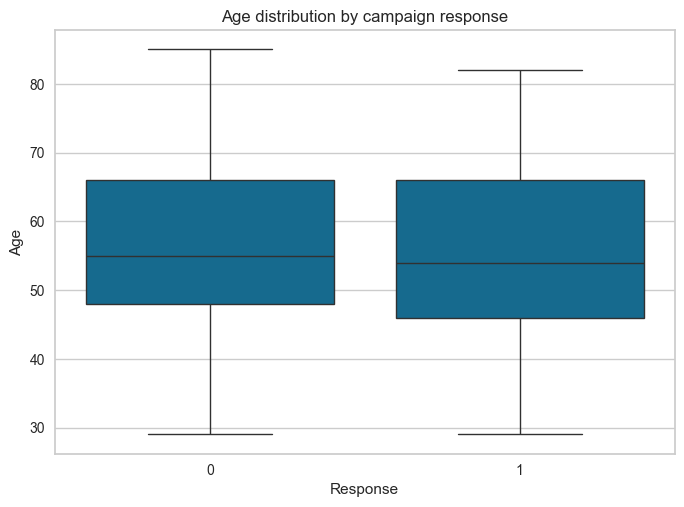

In [28]:
sns.boxplot(x='Response', y='Age', data=data)
plt.title("Age distribution by campaign response")
plt.show()




### **What the Plot Shows**:
- **X-axis (`Response`)**:
  - `0`: Customers who **did not respond** to the campaign.
  - `1`: Customers who **responded** positively to the campaign.
- **Y-axis (`Age`)**: The age of the customers.


### **Analysis**:

1. **Similar Medians**:
   - Both groups have similar **median ages** (around 54–55 years).
   - This suggests age alone might not strongly influence the likelihood of responding.

2. **Age Distribution**:
   - The **interquartile range (IQR)** — the middle 50% of the data — is also very similar for both groups (roughly from age 45 to 65).
   - This indicates that most respondents and non-respondents are within the same age bracket.

3. **Outliers**:
   - The `Response = 0` group has a few **older outliers** (age > 120), which are likely data entry errors or unrealistic values.
   - The `Response = 1` group does not show such extreme outliers.

4. **Age Range**:
   - Both groups span from around 28 to 85 years old, which means the campaign reached a broad age range.



### **Conclusion**:
- There is **no significant difference in age distribution** between those who responded and those who did not.
- Age **may not be a strong predictor** of campaign response.
- It may be useful to combine age with other factors (e.g., income, spending behavior) in further segmentation or predictive modeling.


3) **Investigating Website usage vs. spending**

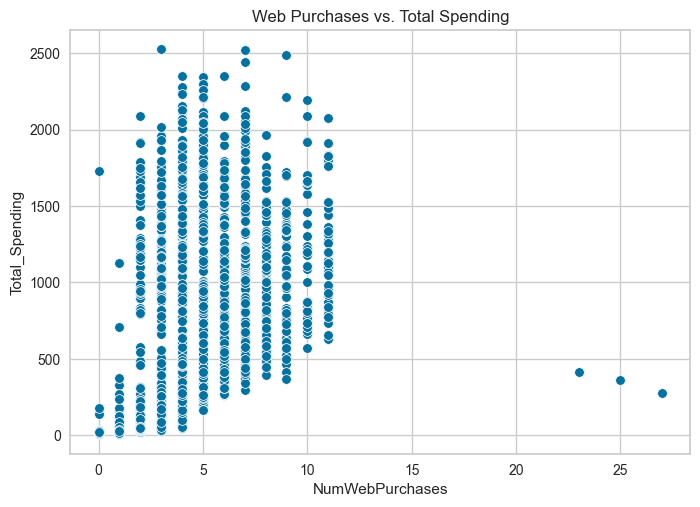

In [29]:
data["Total_Spending"] = data[["MntWines", "MntFruits", "MntMeatProducts",
                               "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

sns.scatterplot(x="NumWebPurchases", y="Total_Spending", data=data)
plt.title("Web Purchases vs. Total Spending")
plt.show()


This **scatter plot** shows the relationship between the **number of web purchases** (`NumWebPurchases`) and **total spending** (`Total_Spending`) by customers.


### **What the Plot Shows**:

- **X-axis (`NumWebPurchases`)**: The number of purchases made through the company’s website.
- **Y-axis (`Total_Spending`)**: The total amount of money spent by each customer across all channels.


### **Analysis**:

1. **Positive Trend (Up to a Point)**:
   - Most customers who made **0–10 web purchases** show a **positive correlation** with total spending: generally, more web purchases → higher spending.
   - However, this relationship seems to **flatten** or even slightly decline after around 6–8 purchases.

2. **High Spending at Low Purchase Counts**:
   - Several customers with **relatively few web purchases (1–5)** still exhibit **high total spending**, suggesting they spend more per purchase or buy through other channels (store, catalog).

3. **Outliers**:
   - A few customers made over **20 web purchases** but have **low total spending**, which is unusual. These could be:
     - Edge cases (e.g., frequent small purchases),
     - Data errors,
     - Or bulk buyers with large discounts.

4. **Dense Clustering**:
   - A large concentration of data points lies between **2–8 purchases** and **500–2000 spending**, indicating that’s where most of the customer base falls.



###  **Conclusion**:
- There's a **mild positive relationship** between number of web purchases and total spending, especially in the lower purchase range.
- Customers who spend the most are **not necessarily the ones with the highest number of web purchases**.




4) **1. Demographic Insights**

a. Age distribution

Text(0.5, 1.0, 'Age distribution')

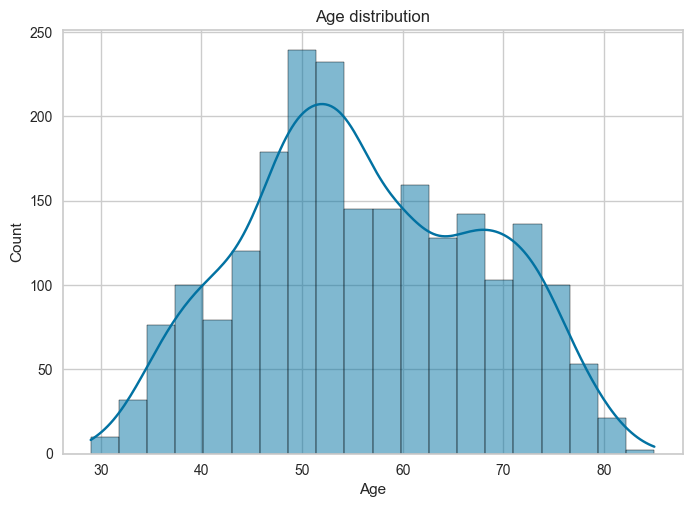

In [30]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age distribution")


### **What the Plot Shows**:

- **X-axis (`Age`)**: The age of customers.
- **Y-axis (`Count`)**: Number of customers in each age group.
- The **bars** represent frequency (histogram), while the **blue line** represents the smoothed probability density (KDE).


### **Analysis**:

1. **Most Customers Are Middle-Aged**:
   - The highest concentration of customers is between **45 and 60 years old**, with the **peak around age 50**.
   - This age group forms the **core customer base**.

2. **Skewness**:
   - The distribution is **slightly right-skewed**, with fewer very old customers than middle-aged ones.

3. **Wide Age Range**:
   - Customers span from about **30 to 85 years old**, indicating the company appeals to a broad age range.

4. **Possible Targeting Insight**:
   - Since most customers are around their **50s**, marketing campaigns can be optimized for the preferences and behaviors of this age group.



### **Conclusion**:
The customer base is predominantly composed of **middle-aged individuals**, especially those around **50 years old**. This insight is crucial for **personalizing marketing messages** and **developing age-relevant campaigns**.

b. Income distribution

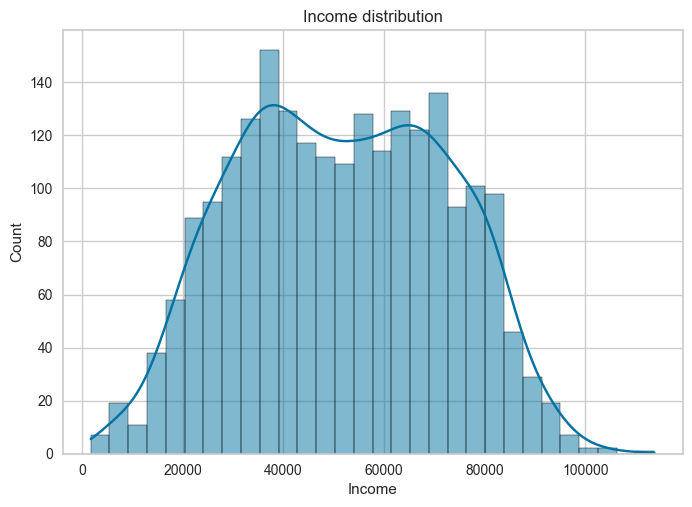

In [31]:
sns.histplot(data['Income'], bins=30, kde=True)
plt.title("Income distribution")
plt.show()

#### Observations:
- The distribution is **right-skewed**, with the majority of customers earning between **30,000 and 75,000**.
- There are **peaks around 35,000 and 65,000**, suggesting common income levels or possibly distinct customer segments.
- A **long tail** extends beyond 100,000, indicating the presence of a few high-income outliers.
- Very few customers have an income below 10,000 or above 120,000.

#### Insights:
- Marketing strategies should be tailored toward the income group of 30,000–75,000, which makes up the bulk of the customer base.
- The presence of high-income outliers suggests an opportunity for premium product marketing, but these should be niche-focused.
- The skewness indicates that using mean income alone may not be representative; **median income** might be a better central measure.

Further analysis could segment customer behavior (e.g., product spending, campaign response) by income brackets to personalize outreach efforts.


c. Age vs. Spending

Text(0.5, 1.0, 'Total Spending vs. Age')

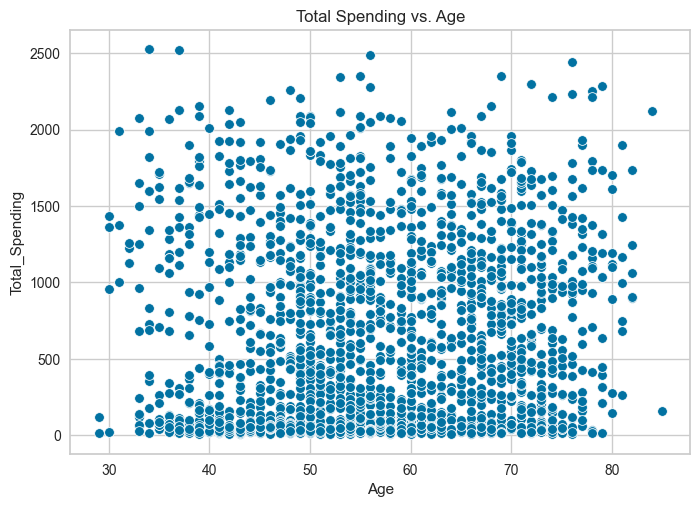

In [32]:
sns.scatterplot(x='Age', y='Total_Spending', data=data)
plt.title("Total Spending vs. Age")


### Analysis of Age vs Total_Spending Scatter Plot

#### Data Overview:
- The scatter plot shows customer **ages from ~28 to 83**, with **Total_Spending** ranging from **0 to ~2500**.

#### Observations:
- **No strong correlation** is visible between age and total spending.
- A **high density of points near zero spending** suggests many customers spend very little or nothing at all.
- Spending is **fairly dispersed** across all age groups, with no clear trend indicating that one age group spends significantly more.
- The age group **40–70** appears most populated, potentially representing the core customer base.

**Spending Behavior**

Text(0.5, 1.0, 'Total Spending per Product Category')

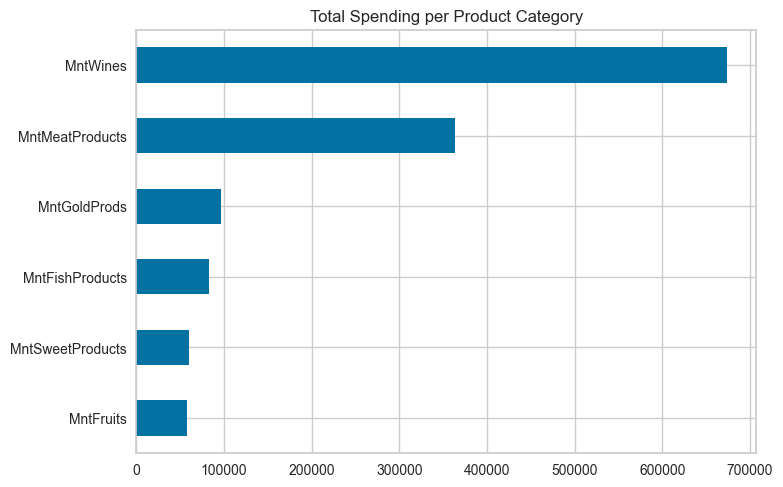

In [33]:
#  Total spending per product type
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data[spending_cols].sum().sort_values().plot(kind='barh')
plt.title("Total Spending per Product Category")



### Product Category Spending Analysis

#### Key Findings:
- **Wines** dominate total spending (~700K), followed by **Meat Products** (~350K).
- Remaining categories — **Gold**, **Fish**, **Sweets**, and **Fruits** — have significantly lower totals, all below 100K.
- This suggests a **strong customer preference or pricing skew** toward wine and meat.


**Spending by Education and Marital Status**

Text(0.5, 1.0, 'Total Spending by Reconstructed Education Level')

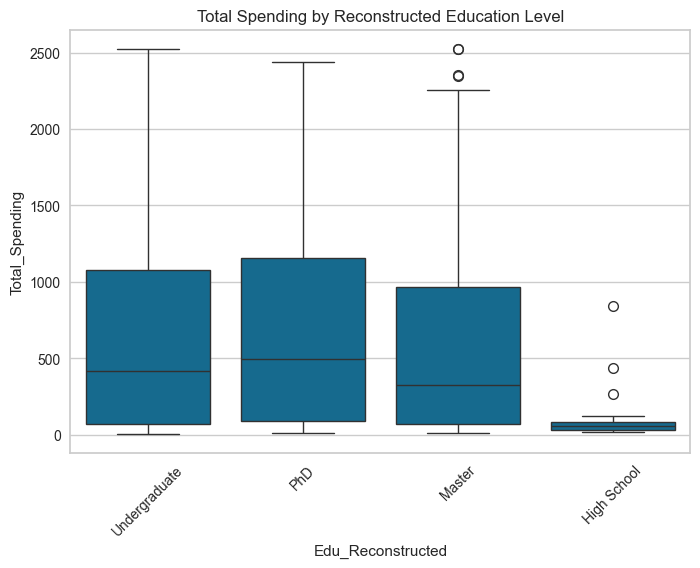

In [34]:
def get_education(row):
    if row['Edu_Master'] == 1:
        return 'Master'
    elif row['Edu_PhD'] == 1:
        return 'PhD'
    elif row['Edu_Undergraduate'] == 1:
        return 'Undergraduate'
    elif row['Edu_high_school'] == 1:
        return 'High School'
    else:
        return 'Other'

data['Edu_Reconstructed'] = data.apply(get_education, axis=1)

sns.boxplot(x='Edu_Reconstructed', y='Total_Spending', data=data)
plt.xticks(rotation=45)
plt.title("Total Spending by Reconstructed Education Level")



### Total Spending by Education Level

#### Insights:
- **PhD holders** show the highest median and a wide range of spending.
- **Undergraduate and Master** groups also spend significantly more than those with **High School education only**.
- **High School** is associated with the **lowest spending**, both in terms of median and distribution.
- Spending among the degree-holding groups is **highly variable**, but all show potential for high-spending individuals.



In [35]:
def get_marital_status(row):
    if row['Mar_Single'] == 1:
        return 'Single'
    elif row['Mar_Together'] == 1:
        return 'Together'

data['Marital_Reconstructed'] = data.apply(get_marital_status, axis=1)


Text(0.5, 1.0, 'Total Spending by Marital Status')

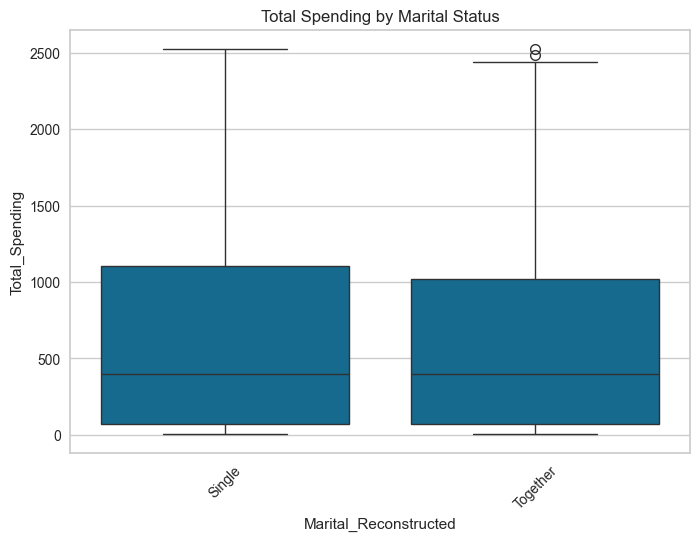

In [36]:
sns.boxplot(x='Marital_Reconstructed', y='Total_Spending', data=data)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")




### Total Spending by Marital Status

#### Observations:
- Both **Single** and **Together** individuals show **similar spending distributions**.
- Median and interquartile ranges are nearly the same.
- Spending ranges from **close to 0 up to ~2500**, with some **outliers** in each group.
- **Marital status does not appear to significantly affect total spending** based on this plot.



**Purchase Channels**

In [37]:
#a. Count of purchases across channels

channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data[channel_cols].sum().plot(kind='bar')


<Axes: >

### Purchase Channel Distribution

This bar chart visualizes the total number of purchases made through different sales channels:

- **NumWebPurchases**: ~9,000
- **NumCatalogPurchases**: ~5,900
- **NumStorePurchases**: ~12,800


### Observations:

- **In-store purchases dominate**, with the highest total count.
- **Web purchases** are the second most common channel, showing strong adoption of digital channels.
- **Catalog purchases** are the least used, indicating this is possibly an outdated or niche channel.


Channel preference by income

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='NumWebPurchases', ylabel='Income'>

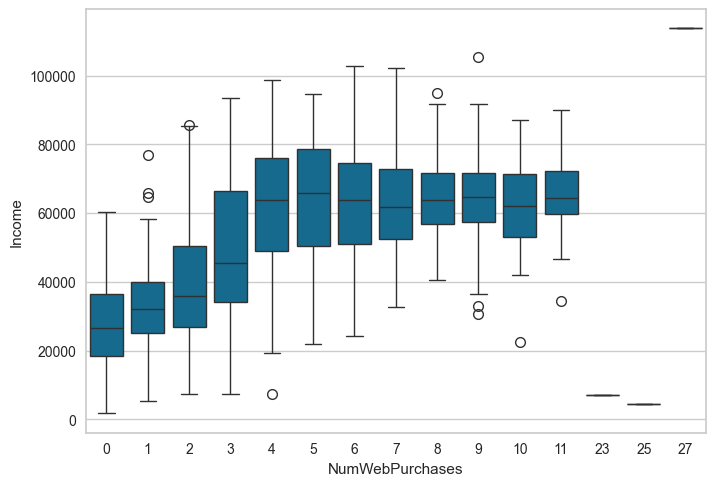

In [38]:
#b. Channel preference by income
sns.boxplot(x='NumWebPurchases', y='Income', data=data)


### Web Purchases vs. Income

This box plot explores the distribution of customer income across different frequencies of **web purchases** (`NumWebPurchases`):



### Observations:

- **Moderate number of web purchases (3–8)** tend to correspond with **higher median incomes**, often peaking between **60,000–75,000**.
- Customers with **0–2 purchases** tend to have significantly **lower income distributions**.
- The **highest incomes (100k+)** appear sparsely at higher purchase counts (e.g., 27), likely **outliers** or **premium spenders**.
- A few low-income outliers exist at high web purchase counts, possibly anomalies or edge cases.


In [39]:
data = data.drop(columns=["Edu_Reconstructed" , "Marital_Reconstructed"])#Drop redundant columns
data

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                   88            88                  3                8  ...   
1                    1             6                  2                1  ...   
2                   21            42                  1                8  ...   
3                    3             5                  2                2  ...   
4                   27            15                  5                5  ...   
...                ...           ...                ...              ...  ...   
2235               118           247                  2                9  ...   
2236                 0             8                  7                8  ...   
2237                12            24                  1                2  ...   
2238                30            61                  2                6  ...   
2239                 1            21                  3                3  ...   

      Age  Edu_Master  Edu_PhD  Edu_Undergraduate  Edu_high_school  \
0      68           0        0                  1                0   
1      71           0        0                  1                0   
2      60           0        0                  1                0   
3      41           0        0                  1                0   
4      44           0        1                  0                0   
...   ...         ...      ...                ...              ...   
2235   58           0        0                  1                0   
2236   79           0        1                  0                0   
2237   44           0        0                  1                0   
2238   69           1        0                  0                0   
2239   71           0        1                  0                0   

      Mar_Single  Mar_Together  Seniority  Children  Total_Spending  
0              1             0        154         0            1617  
1              1             0        136         2              27  
2              0             1        142         0             776  
3              0             1        137         1              53  
4              0             1        137         1             422  
...          ...           ...        ...       ...             ...  
2235           0             1        145         1            1341  
2236           0             1        133         3             444  
2237           1             0        137         0            1241  
2238           0             1        137         1             843  
2239           0             1        153         2             172  

[2201 rows x 30 columns]

# Task 5 – Dimensionality Reduction

In [40]:
data.dtypes

Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Edu_Master               int64
Edu_PhD                  int64
Edu_Undergraduate        int64
Edu_high_school          int64
Mar_Single               int64
Mar_Together             int64
Seniority                int64
Children                 int64
Total_Spending           int64
dtype: object

In [41]:

scaler = StandardScaler()#the choice of standard scaler is to standardise the data for PCA
#StandardScaler standardizes features by removing the mean and scaling to unit variance
 
data_sc = scaler.fit_transform(data)
print(type(data_sc))
data_sc = pd.DataFrame(data_sc, index=data.index, columns=data.columns)
data_sc.round(2)

<class 'numpy.ndarray'>


Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       0.32     0.31      0.97       1.55             1.75             2.46   
1      -0.25    -0.38     -0.87      -0.64            -0.73            -0.65   
2       0.97    -0.80      0.36       0.57            -0.18             1.34   
3      -1.20    -0.80     -0.87      -0.56            -0.67            -0.51   
4       0.32     1.55     -0.39       0.42            -0.22             0.15   
...      ...      ...       ...        ...              ...              ...   
2235    0.46    -0.11      1.19       0.42             0.08             0.08   
2236    0.60     0.24      0.30      -0.66            -0.62            -0.69   
2237    0.26     1.45      1.78       0.54             0.24            -0.10   
2238    0.85    -1.42      0.36       0.09             0.22             0.78   
2239    0.06    -0.31     -0.66      -0.59            -0.48            -0.65   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0                 1.48          0.86               0.36             1.43  ...   
1                -0.64         -0.74              -0.17            -1.13  ...   
2                -0.15         -0.04              -0.70             1.43  ...   
3                -0.59         -0.76              -0.17            -0.77  ...   
4                -0.00         -0.56               1.42             0.33  ...   
...                ...           ...                ...              ...  ...   
2235              2.21          3.94              -0.17             1.79  ...   
2236             -0.66         -0.70               2.48             1.43  ...   
2237             -0.37         -0.39              -0.70            -0.77  ...   
2238              0.07          0.33              -0.17             0.69  ...   
2239             -0.64         -0.44               0.36            -0.40  ...   

       Age  Edu_Master  Edu_PhD  Edu_Undergraduate  Edu_high_school  \
0     1.02       -0.58    -0.52               0.99            -0.16   
1     1.27       -0.58    -0.52               0.99            -0.16   
2     0.33       -0.58    -0.52               0.99            -0.16   
3    -1.29       -0.58    -0.52               0.99            -0.16   
4    -1.03       -0.58     1.91              -1.01            -0.16   
...    ...         ...      ...                ...              ...   
2235  0.16       -0.58    -0.52               0.99            -0.16   
2236  1.96       -0.58     1.91              -1.01            -0.16   
2237 -1.03       -0.58    -0.52               0.99            -0.16   
2238  1.10        1.71    -0.52              -1.01            -0.16   
2239  1.27       -0.58     1.91              -1.01            -0.16   

      Mar_Single  Mar_Together  Seniority  Children  Total_Spending  
0           1.35         -1.35       1.50     -1.27            1.68  
1           1.35         -1.35      -1.16      1.40           -0.96  
2          -0.74          0.74      -0.27     -1.27            0.28  
3          -0.74          0.74      -1.01      0.07           -0.92  
4          -0.74          0.74      -1.01      0.07           -0.31  
...          ...           ...        ...       ...             ...  
2235       -0.74          0.74       0.17      0.07            1.22  
2236       -0.74          0.74      -1.60      2.74           -0.27  
2237        1.35         -1.35      -1.01     -1.27            1.05  
2238       -0.74          0.74      -1.01      0.07            0.39  
2239       -0.74          0.74       1.35      1.40           -0.72  

[2201 rows x 30 columns]

In [91]:
model = pca(n_components=0.8)#selecting the number of components that explain 80% of the variance

# Fit transform
results = model.fit_transform(data_sc)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [14] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


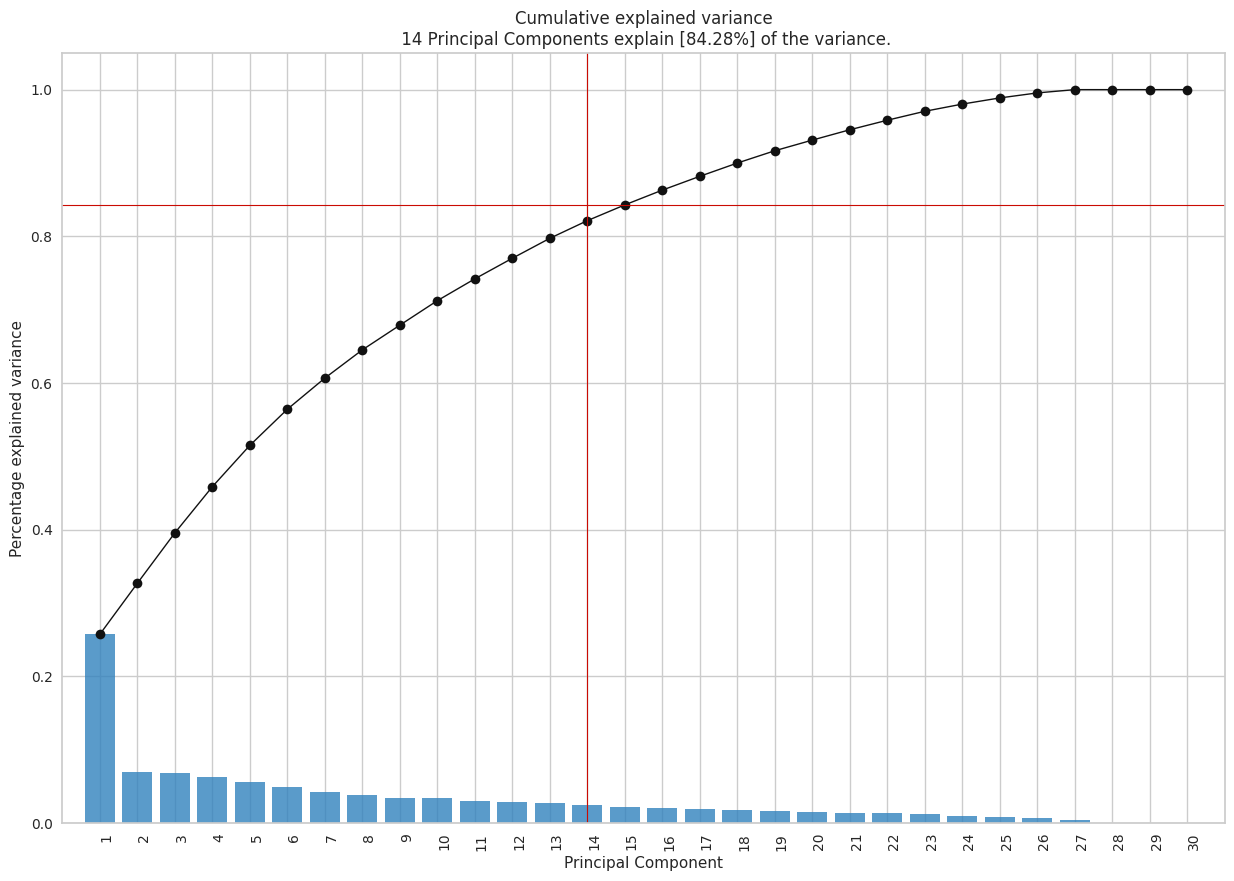

In [92]:
# explained variance
fig, ax = model.plot()

### Principal Component Analysis (PCA) – Cumulative Explained Variance





### Key Insights:

- **14 principal components** explain approximately **84.28%** of the total variance.
- The curve follows an "elbow" shape, flattening after the 14th component, indicating **diminishing returns** beyond this point.
- The **first component alone** captures around **26%** of the variance, and the first **5 components** together explain about **60%**.
- Beyond the 14th component, each additional PC contributes **very little** to the overall variance, indicating **redundant or noisy dimensions**.


### Interpretation:

- **Dimensionality reduction** to **14 components** is a **balanced trade-off**—it simplifies the model while retaining ~84% of the original data's variability.


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


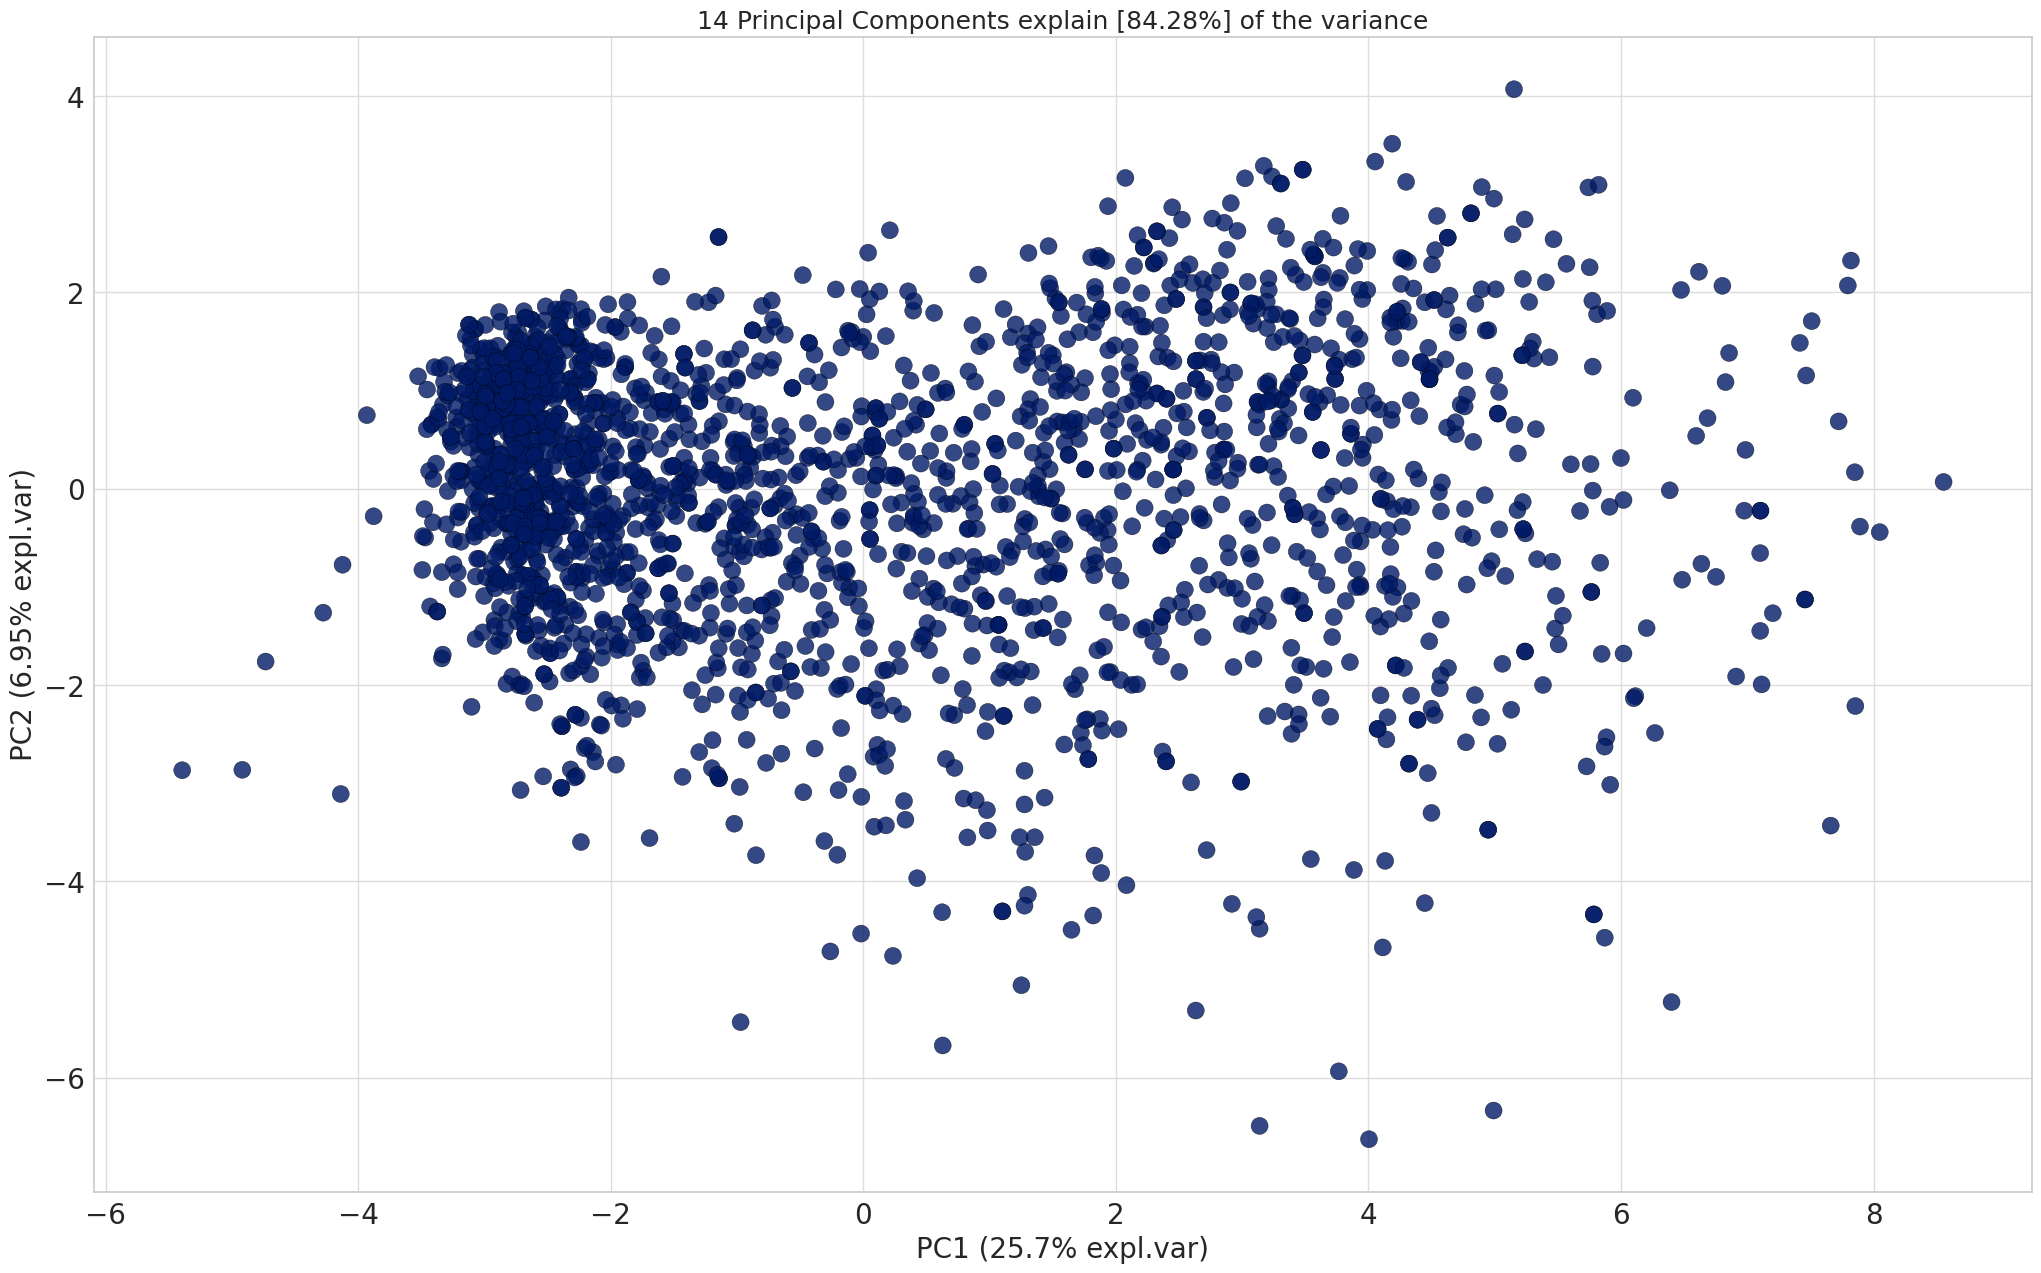

In [93]:
# Scatter first 2 PCs (1 and 2)
fig, ax = model.scatter(legend=False)

### Key Observation:

- **No clear clusters** or separable groups are immediately visible, which may suggest the need for further dimensionality reduction or clustering techniques like **K-Means** or **DBSCAN**.


In [94]:
# biplot with number of original features (plot data and loadings)
fig, ax = model.biplot(n_feat=10, legend=False, s=20)

# Update font size of tick labels
ax.tick_params(axis='both', labelsize=14)


# Make the point labels larger
for text in ax.texts:
    text.set_fontsize(30)



[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


### PCA Biplot Analysis Summary

This biplot visualizes the first two principal components (PC1 and PC2), explaining **32.65%** of the total variance.

- **PC1 (25.7%)** is influenced by variables like **Age**, **Total Spending**, and **Education**, suggesting it captures general purchasing behavior.
- **PC2 (6.95%)** is driven by **Complain**, **Recency**, and **Education**, indicating recent engagement or dissatisfaction.

Key observations:
- **Complain (0.77)** and **Recency (0.68)** are the most influential variables.
- **Educational levels** (e.g., PhD, Master, High School) contribute moderately to both PCs.
- **Total Spending (0.35)** separates high vs. low spenders along PC1.

Only a portion of the data variance is visible in this 2D projection; further components are needed for a full picture.




In [95]:
model.results['loadings'].round(3)

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
PC1    0.315    0.003     0.290      0.244            0.301            0.254   
PC2    0.000    0.065    -0.209      0.173            0.072            0.183   
PC3    0.055    0.018     0.157     -0.096           -0.064           -0.089   
PC4   -0.021    0.072    -0.026      0.119           -0.018            0.105   
PC5   -0.121   -0.050    -0.014     -0.012           -0.007           -0.016   
PC6   -0.149   -0.163    -0.059      0.099            0.044            0.111   
PC7   -0.047   -0.120    -0.017      0.060            0.057            0.024   
PC8   -0.094    0.409     0.090     -0.000            0.019            0.010   
PC9   -0.004    0.679     0.021     -0.041            0.018           -0.043   
PC10   0.003   -0.369    -0.001      0.043            0.044            0.014   
PC11   0.010   -0.228    -0.007     -0.010           -0.132            0.024   
PC12  -0.024    0.183    -0.054     -0.038            0.082            0.046   
PC13  -0.063    0.002    -0.033     -0.002           -0.009            0.032   
PC14  -0.022    0.074    -0.216      0.262            0.025            0.292   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
PC1              0.247         0.202             -0.054            0.196  ...   
PC2              0.157         0.005             -0.259           -0.188  ...   
PC3             -0.075         0.018              0.283            0.214  ...   
PC4              0.095         0.234              0.408            0.272  ...   
PC5             -0.004         0.083              0.001           -0.036  ...   
PC6              0.088         0.145              0.047            0.019  ...   
PC7              0.017         0.008             -0.078            0.019  ...   
PC8              0.034        -0.073             -0.053           -0.012  ...   
PC9             -0.028         0.073             -0.047           -0.034  ...   
PC10             0.012        -0.199             -0.066           -0.042  ...   
PC11            -0.032         0.192              0.028            0.067  ...   
PC12             0.039        -0.102             -0.062           -0.121  ...   
PC13            -0.070         0.101             -0.312           -0.145  ...   
PC14             0.332        -0.139              0.245           -0.188  ...   

        Age  Edu_Master  Edu_PhD  Edu_Undergraduate  Edu_high_school  \
PC1   0.049      -0.014    0.009              0.023           -0.059   
PC2  -0.098      -0.001   -0.251              0.195            0.039   
PC3   0.154       0.072    0.138             -0.150           -0.086   
PC4   0.072      -0.129   -0.199              0.297           -0.068   
PC5  -0.243      -0.337   -0.318              0.533            0.074   
PC6  -0.280       0.511   -0.213             -0.348            0.251   
PC7  -0.039      -0.524    0.573             -0.078            0.207   
PC8  -0.209      -0.124    0.078             -0.118            0.524   
PC9   0.036       0.053    0.033             -0.054           -0.065   
PC10  0.024      -0.041    0.057             -0.010           -0.003   
PC11  0.461      -0.043   -0.179             -0.014            0.640   
PC12  0.601       0.016   -0.101              0.035            0.109   
PC13  0.370       0.058   -0.001              0.034           -0.274   
PC14 -0.000      -0.019    0.147             -0.102           -0.008   

      Mar_Single  Mar_Together  Seniority  Children  Total_Spending  
PC1        0.012        -0.012      0.038    -0.205           0.345  
PC2       -0.340         0.340     -0.196    -0.151          -0.052  
PC3       -0.561         0.561      0.108     0.193           0.047  
PC4        0.150        -0.150      0.300     0.185           0.023  
PC5       -0.163         0.163      0.167    -0.044          -0.006  
PC6       -0.069         0.069      0.296    -0.138           0.017  
PC7       -0.085  

In [96]:
data_pca = model.results['PC']

In [97]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     4.340023 -1.143719 -1.752448  2.512743  0.821303  1.004904  0.803775   
1    -2.556353 -0.233834 -1.887460  0.235527 -0.237460 -1.908903 -0.621739   
2     1.708565  1.593737  0.505627  0.585168  0.247094 -0.621706  0.196587   
3    -2.620169  1.453098 -0.060634 -0.511120  1.273601 -0.416645  0.026971   
4    -0.361776  0.337835  1.349075 -0.163854 -1.198232 -0.676080  1.248486   
...        ...       ...       ...       ...       ...       ...       ...   
2235  2.534032  0.996460  1.012138  2.135886  0.981428  0.197133  0.236562   
2236 -0.851819 -2.076302  3.187100 -0.263590 -1.031899 -1.968057  0.445449   
2237  1.827405 -0.882407 -1.501552 -0.306382  0.383320 -2.024788 -1.758241   
2238  1.598514  0.998715  1.273965 -0.311314 -1.965429  0.689588 -0.989477   
2239 -1.760310 -1.772308  1.685330 -0.395528 -0.273035  0.060163  1.896445   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0     0.130308 -0.125084  0.354441 -0.389796  1.582252  1.316241  0.701845  
1    -1.157082 -0.285882 -0.157392  0.866716  0.840269 -0.062036  0.278328  
2    -0.245025 -1.019714  0.439448  0.538398 -0.574663  0.441798 -0.825800  
3    -0.382525 -0.848332  0.177701 -0.408285 -0.878811 -0.484595 -0.169552  
4     0.764578  0.830199 -0.651977 -1.030652 -1.018027 -1.228715  1.119625  
...        ...       ...       ...       ...       ...       ...       ...  
2235 -0.232823 -0.038957 -0.765711  0.742216 -0.367778  0.265128 -0.530187  
2236 -1.452275  0.243539 -0.856948  0.901365  1.651248 -3.072718  2.320679  
2237  2.106604  0.174396 -0.199653 -0.528766 -1.404168 -0.522376 -1.856279  
2238 -1.310329 -0.955688  0.215845  1.250604 -0.315274  0.138228 -0.307652  
2239 -0.596852 -0.374717  0.787136 -0.551635  1.605433  0.946148  0.927934  

[2201 rows x 14 columns]

# Task 6 – Exploratory Data Analysis: Clustering

### Choice of Distance Metric: Euclidean Distance and Gower distance
 **Euclidean distance** was selected as the distance metric. This choice is justified for the following reasons:

- **Standardization**: All numerical features were scaled using standard scaling (`StandardScaler`), which ensures that features contribute equally to the distance computation and removes the bias of differing units or magnitudes.
  
- **One-Hot Encoded Categorical Variables**: Categorical features were transformed using **one-hot encoding**, resulting in binary (0/1) variables. In this format, Euclidean distance effectively measures dissimilarity between categories as it becomes proportional to the number of differing attributes.

- It is computationally efficient and works well for **dense and continuous-valued data**, which my dataset conforms to after preprocessing.

### **The Gower distance function was also tried on DBSCAN and HAC for the scaled data due to its suitablity for mixed data types (numerical and categorical).**


**K-MEANS CLUSTERING**

a. for the data


In [98]:
silhouettes=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=1, n_init=20,init='k-means++') # KMeans clustering with 20 initializations,random_state=1 and k-means++ initialization.
    cluster_assignments = kmeans.fit_predict(data_sc) 
    silhouettes.append(silhouette_score(data_sc,cluster_assignments))

In [99]:
silhouettes_1=[]

for k in range(2,11):
    kmeans_1=KMeans(n_clusters=k, random_state=1, n_init=20,init='k-means++') 
    cluster_assignments_1 = kmeans_1.fit_predict(data_pca) 
    silhouettes_1.append(silhouette_score(data_pca,cluster_assignments_1))

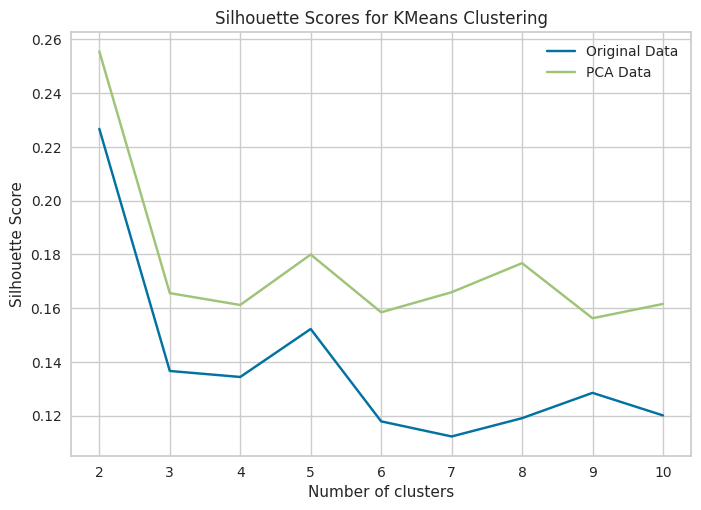

In [100]:
plt.plot(range(2,11), silhouettes)# Plot silhouette scores for KMeans clustering on original data
plt.plot(range(2,11), silhouettes_1)# Plot silhouette scores for KMeans clustering on PCA data
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans Clustering")
plt.legend(["Original Data", "PCA Data"])
plt.show()


### Key Observations:

-  **PCA Data consistently outperforms** the original data across all tested cluster counts.
-  **Highest Silhouette Score (~0.26)** occurs with **2 clusters** using PCA data — suggesting a natural separation into 2 distinct customer segments(though it is a weak structure).
-  After 2 clusters, scores drop but **remain more stable** for PCA data than the original dataset.
-  **Original data shows more fluctuation** and generally lower silhouette scores, implying noisier or less separable structure.


### Interpretation:

- PCA transformation likely removed noise and redundancy, **enhancing the clustering structure**.
- The optimal number of clusters using PCA data is **2**.
- Even though the highest score indicates just a weak clustering structure, PCA makes a **noticeable positive impact**.


In [101]:
silhouettes,silhouettes_1

([np.float64(0.22672538992163707),
  np.float64(0.13666305625484235),
  np.float64(0.13442996756787715),
  np.float64(0.1522822218974903),
  np.float64(0.11791818478222466),
  np.float64(0.11229336815439424),
  np.float64(0.11909831372550764),
  np.float64(0.1285207316079736),
  np.float64(0.12013038871593497)],
 [np.float64(0.25552843661126423),
  np.float64(0.16561631763839202),
  np.float64(0.16121559319320203),
  np.float64(0.17998063900129482),
  np.float64(0.15848661580874843),
  np.float64(0.16596057415139184),
  np.float64(0.17677683396570498),
  np.float64(0.15628058881818566),
  np.float64(0.1616001332617363)])

**KMeans for the scaled data**

In [102]:
def plot_clusters_full_data(kmeans, X_full, plot_indices=[0, 1], labels=None):
    """
    Perform KMeans clustering on the full dataset and plot any two selected dimensions.

    Parameters:
    - kmeans: an instance of KMeans (already configured with n_clusters, etc.)
    - X_full: 2D array or DataFrame (already scaled or PCA-transformed)
    - plot_indices: list of two integers indicating which dimensions to plot
    - labels: optional list of two strings for axis labels
    """
    # Fit the clustering model
    cluster_labels = kmeans.fit_predict(X_full)
    
    # Handle axis labels
    if labels is None:
        labels = [f"Feature {plot_indices[0]}", f"Feature {plot_indices[1]}"]
    
    # Plotting
    plt.figure(figsize=(8, 8))
    for i in np.unique(cluster_labels):
        plt.scatter(
            X_full.iloc[cluster_labels == i, plot_indices[0]],
            X_full.iloc[cluster_labels == i, plot_indices[1]],
            label=f"Cluster {i}"
        )
    
    centers = kmeans.cluster_centers_
    plt.scatter(
        centers[:, plot_indices[0]],
        centers[:, plot_indices[1]],
        s=350, marker='*', c='crimson', edgecolor='black', label='Centroids'
    )

    plt.title("Customer Segmentation via KMeans")
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.grid(True)
    plt.show()

    # Silhouette score visualization
    visualizer = SilhouetteVisualizer(kmeans, is_fitted=True)
    visualizer.fit(X_full)
    visualizer.finalize()
    print(f"Silhouette Score: {visualizer.silhouette_score_:.3f}")
    visualizer.show()

    return cluster_labels



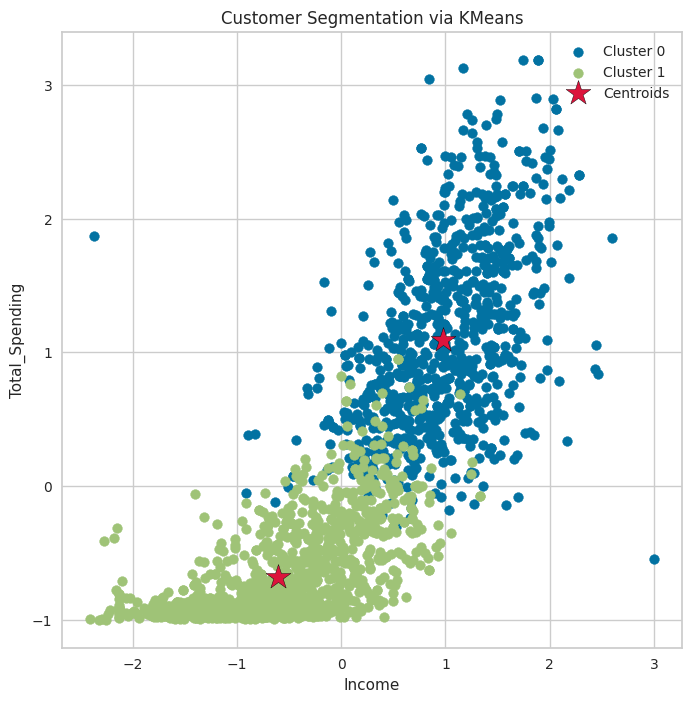

c:\Users\Godwin\Documents\Data_anlysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.227


In [103]:
#Scaled data with original features
cluster_labels = plot_clusters_full_data(
    kmeans=KMeans(n_clusters=2, random_state=1, n_init=20, init='k-means++'),  # KMeans clustering with 20 initializations
    X_full=data_sc,  # all features
    plot_indices=[0, -1],  # "Income" vs "Total_Spending"
    labels=["Income", "Total_Spending"] 
)

**For the Silhouette score**:
The average silhouette score is slightly above **0.2**, placing it in the **"no substantial structure"** category based on silhouette interpretation rules. This suggests:

* **Poor cluster separation**: A significant number of points have silhouette coefficients near or below 0, indicating overlap and misclassification.
* **Imbalanced cohesion**: One cluster (gray) has generally better silhouette values, while the other (red) has many points around or below zero.


**For the Clustering**:

- Visually, clusters make sense, but the overlap and dispersion reflect the low silhouette score (~0.21)
- Suggests that cluster assignments are not well-defined
- Further segmentation (e.g., different algorithm) may improve results




In [104]:
#Scaled data with original features
cluster_labels = plot_clusters_full_data(
    kmeans=KMeans(n_clusters=3, random_state=1, n_init=20, init='k-means++'),  # KMeans clustering with 20 initializations
    X_full=data_sc,  # all features
    plot_indices=[0, -1],  # "Income" vs "Total_Spending"
    labels=["Income", "Total_Spending"] 
)

c:\Users\Godwin\Documents\Data_anlysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.137


**For the Silhouette Score**:
- Average silhouette score has **decreased** (now ~0.137), indicating a **worsening** in clustering quality compared to the 2-cluster model (~0.21)
- Clusters 0 and 2 show many points with negative or near-zero values, suggesting **poor separation** and possible misassignments
- Only Cluster 1 appears somewhat well-formed
- Increasing to 3 clusters did **not improve structure** and instead introduced **more noise**
- Suggests that the data may not naturally support 3 distinct clusters.


**For the Cluster Visualization Analysis**:

The KMeans clustering result shows **visually distinct groupings** in the 2D feature space of **Income** vs. **Total Spending**, yet the previously noted **average silhouette score of \~0.137** indicates that:

* **Cluster 1** (light green, lower left) is tightly grouped but far from others — likely contributing positively to the silhouette score.
* **Clusters 0 & 2** (blue and red) exhibit **significant overlap**, particularly in the middle region. This overlap causes **ambiguous boundaries** and poor cluster separation, likely reducing the overall silhouette score.
* Some cluster assignments may be driven more by density than by distinct behavioral patterns.

Despite the apparent structure, the **low silhouette coefficient confirms there is no clustering structure**, suggesting the model may be overfitting noise.


**KMeans for the PCA data**

c:\Users\Godwin\Documents\Data_anlysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.256


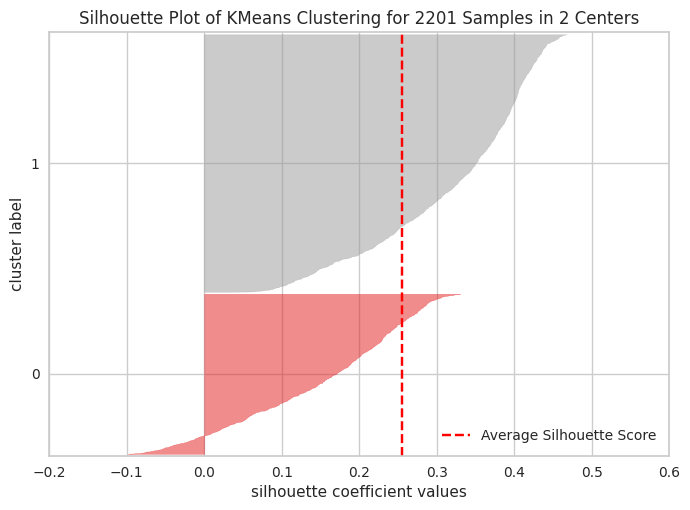

In [105]:
cluster_labels = plot_clusters_full_data(
    kmeans=KMeans(n_clusters=2, random_state=1, n_init=20, init='k-means++'),  # KMeans clustering with 20 initializations
    X_full=data_pca,
    plot_indices=[0, 1],  # e.g., first and second components
    labels=["PC1", "PC2"]
)


**For the Silhouette scores**:
The silhouette plot for the PCA-transformed data with 2 clusters shows an average silhouette score of approximately 0.26. This indicates a weak clustering quality. While the separation is clearer than in unstructured data, some samples near the 0 mark suggest boundary ambiguity. PCA likely preserved enough variance for KMeans to identify distinct patterns, though further optimization or more components might enhance performance.

**For the Clustering**: 
Based on the silhouette plot for the PCA-transformed data with 2 clusters, the average silhouette score is approximately **0.26**. According to the silhouette coefficient interpretation:

- **0.5 ≥ sC > 0.25** indicates a **weak structure**.
- This suggests that while some clustering tendency exists in the PCA-reduced space, the separation between the clusters is not particularly strong.
- A portion of the points lies close to or below a silhouette value of 0, indicating overlap or ambiguous assignment.

**Conclusion:** The clustering on PCA-reduced data with 2 clusters reveals a **weak structure**.


c:\Users\Godwin\Documents\Data_anlysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.166


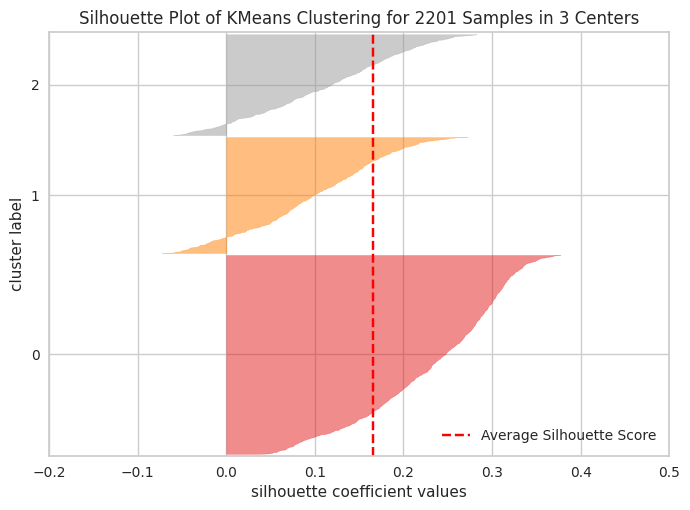

In [106]:
cluster_labels = plot_clusters_full_data(
    kmeans=KMeans(n_clusters=3, random_state=1, n_init=20, init='k-means++'),  # KMeans clustering with 20 initializations
    X_full=data_pca,
    plot_indices=[0, 1],  # e.g., first and second components
    labels=["PC1", "PC2"])

**For the Silhouette score**:
The clustering at `k = 3` reveals some separable structure in the data, but the relatively lower silhouette score suggests potential overlap between clusters.


**For the Cluster Visualization Analysis**:

The KMeans clustering result again shows **visually distinct groupings** in the 2D feature space of **PC1** vs. **PC2**, yet the  **average silhouette score of \~0.0.166** indicates that there in substantial clustering structure.

**DBSCAN for the scaled data**

In [107]:
# Define different values for epsilon (neighborhood radius) and min_samples (minimum points) for DBSCAN
epsilons = (0.02, 0.03, 0.05)
min_ptss = (2, 3, 4)

# Set point size for scatter plots
point_size = 2

# Create a grid of all (epsilon, min_samples) combinations for subplots
epss, ptss = np.meshgrid(epsilons, min_ptss)

# Create a grid of subplots
_, axes = plt.subplots(nrows=len(min_ptss), ncols=len(epsilons), figsize=(18, 10))

# Compute Gower distance matrix for the dataset
# Gower distance is suitable for mixed data types (numerical and categorical)
distance_matrix = gower.gower_matrix(data_sc)

# Loop over each subplot axis and corresponding parameter combination
for ax, eps, min_pts in zip(axes.reshape(-1), epss.reshape(-1), ptss.reshape(-1)):
    # Turn off axis lines and labels
    ax.set_axis_off()

    # Initialize DBSCAN with Gower distance and current parameters
    dbscan = DBSCAN(metric='precomputed', eps=eps, min_samples=min_pts)

    # Fit the model and get predicted cluster labels
    y_pred = dbscan.fit_predict(distance_matrix)

    # Get the unique cluster labels (including -1 for noise)
    unique_labels = np.unique(y_pred)
    print(f"{len(unique_labels)} clusters for eps={eps} and min_pts={min_pts}")
    
    # Plot each cluster (or noise) using Income vs. Total_Spending
    for label in unique_labels:
        # Color black for noise points (label -1), else default color
        color = 'black' if label == -1 else None
        ax.scatter(
            data_sc.loc[y_pred == label, "Income"],           # x-axis: Income
            data_sc.loc[y_pred == label, "Total_Spending"],   # y-axis: Total Spending
            label=f"Cluster {label}" if label != -1 else "Noise",
            c=color
        )

    # Set the title for each subplot to show the DBSCAN parameters
    ax.set_title(r'$\epsilon=$%.2f, minPts=%i' % (eps, min_pts), fontsize=10)


# Adjust layout to prevent overlap
plt.tight_layout()
# Display all the subplots
plt.show()


215 clusters for eps=0.02 and min_pts=2
165 clusters for eps=0.03 and min_pts=2
130 clusters for eps=0.05 and min_pts=2
45 clusters for eps=0.02 and min_pts=3
34 clusters for eps=0.03 and min_pts=3
36 clusters for eps=0.05 and min_pts=3
22 clusters for eps=0.02 and min_pts=4
16 clusters for eps=0.03 and min_pts=4
23 clusters for eps=0.05 and min_pts=4


### Key Observations:

- **Top row (minPts=2):**
  - Detects **many small clusters**, even for low ε.
  - High sensitivity — but may over-cluster or include noise as clusters.
- **Middle row (minPts=3):**
  - Better balance: identifies dense regions while filtering some noise.
  - ε = 0.05 shows the best structure.
- **Bottom row (minPts=4):**
  - More conservative — fewer clusters, more points treated as noise.
  - Effective for **noise-resistant segmentation**, but may under-cluster.

**DBSCAN for the PCA data**

The Euclidean distance will always be used for the PCA data because the effect of categorical variables have already been taken care of in the PCA data.

In [108]:
epsilons = (1.5, 2, 3) 
min_ptss = (2,3, 4)
point_size = 10


# Grid setup for plotting
epss, ptss = np.meshgrid(epsilons, min_ptss)
_, axes = plt.subplots(nrows=len(min_ptss), ncols=len(epsilons), figsize=(18, 10))

for ax, eps, min_pts in zip(axes.reshape(-1), epss.reshape(-1), ptss.reshape(-1)):
    ax.set_axis_off()

    dbscan = DBSCAN(eps=eps, min_samples=min_pts)
    y_pred = dbscan.fit_predict(data_pca)

    unique_labels = np.unique(y_pred)
    print(f"{len(unique_labels)} clusters for eps={eps} and min_pts={min_pts}")
    
    for label in unique_labels:
        color = 'black' if label == -1 else None
        ax.scatter(
            data_pca.iloc[y_pred == label, 0],  # PC1
            data_pca.iloc[y_pred == label, 1],  # PC2
            s=point_size,
            label=f"Cluster {label}" if label != -1 else "Noise",
            c=color
        )

    ax.set_title(r'$\epsilon=$%.2f, minPts=%i' % (eps, min_pts), fontsize=10)

plt.tight_layout()
plt.show()


184 clusters for eps=1.5 and min_pts=2
103 clusters for eps=2.0 and min_pts=2
46 clusters for eps=3.0 and min_pts=2
66 clusters for eps=1.5 and min_pts=3
37 clusters for eps=2.0 and min_pts=3
21 clusters for eps=3.0 and min_pts=3
44 clusters for eps=1.5 and min_pts=4
28 clusters for eps=2.0 and min_pts=4
17 clusters for eps=3.0 and min_pts=4


### Observations:

-  **For ε = 2.0, minPts = 2 or 3** yields:
  - Clear, coherent cluster structure.
  - Minimal noise.
  - Visually distinguishable groupings — **likely optimal, but still with a lot of overlapping data points!**.

-  **For ε = 3.0**:
  - Tends to **over-cluster** or **merge** different groups into a dominant group.
  - Almost uniform color with less noise, but much less meaningful clustering.

-  **minPts = 4**:
  - Increases noise (black points), especially when ε is smaller (1.5).
  - Seems to **fragment** some clusters unnecessarily.



### Comparison to Original Data:

- Clustering on PCA-reduced data generally shows **better compactness** and **clearer separations** compared to DBSCAN on the original data.
- PCA helps by reducing noise and aligning the data more closely with true density structures.


### Best Configurations (Visually):

- **ε = 2.0**, `minPts = 2 or 3` — well-balanced, dense clusters with minimal noise.

**HAC for the scaled data**

Comparison of dendrogram for the "complete","single","average" linkage methods.

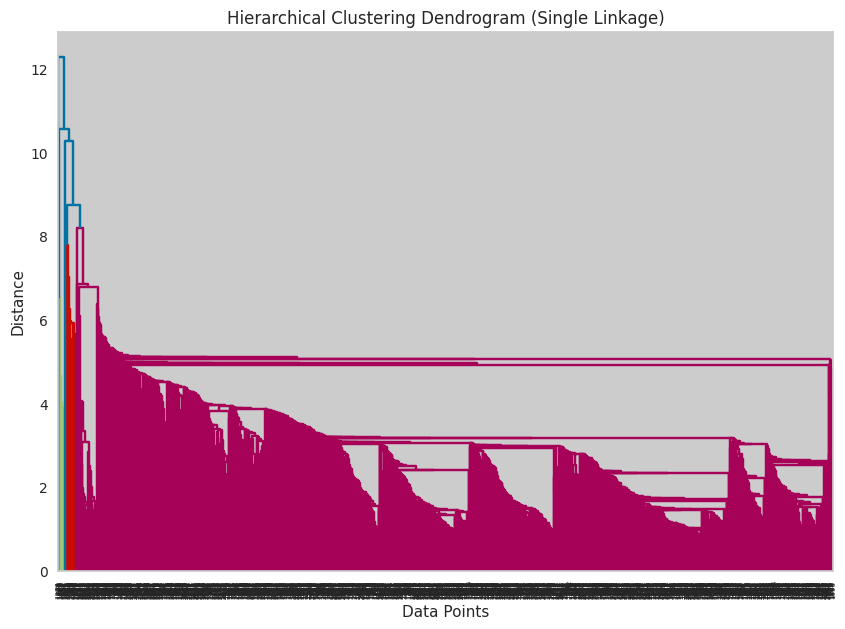

In [109]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_sc, method='single'))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

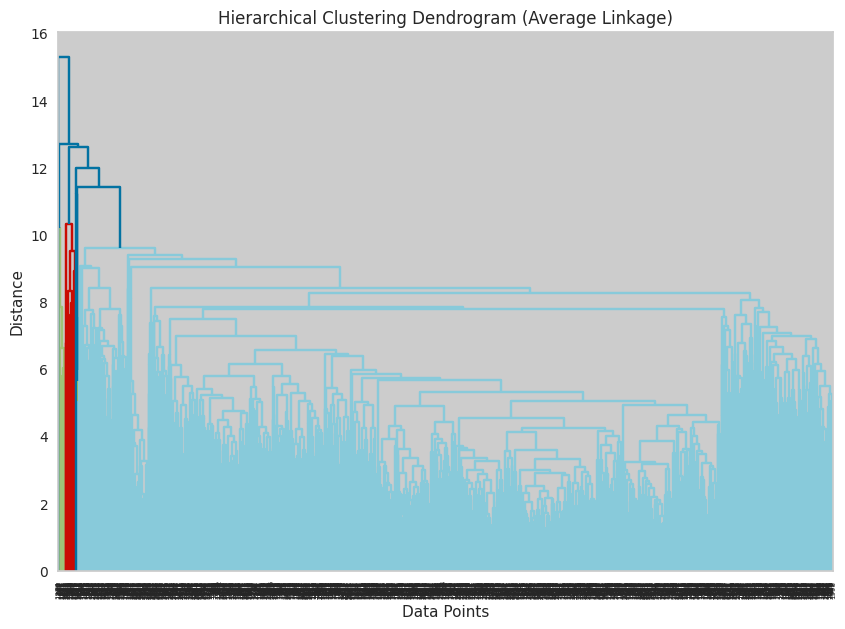

In [110]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_sc, method='average'))
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

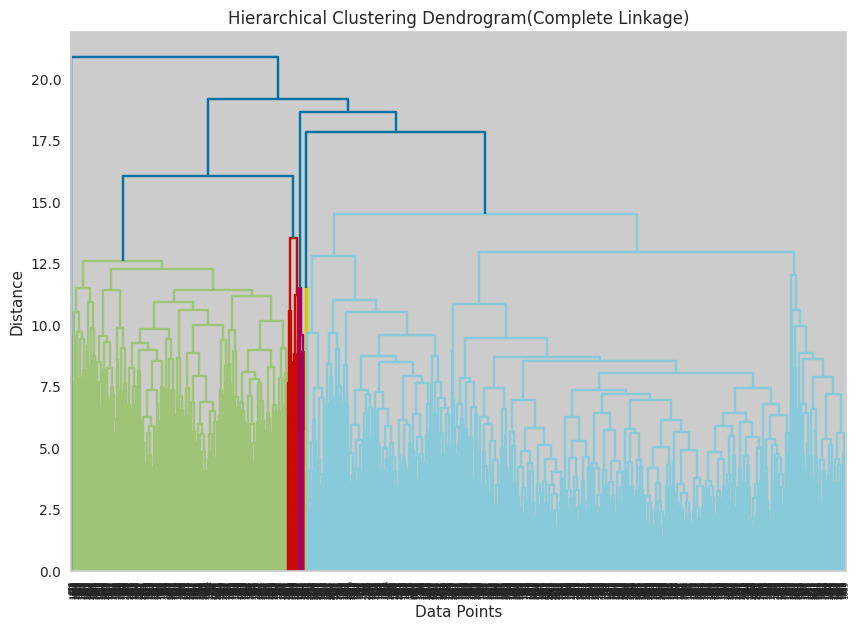

In [111]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_sc, method='complete'))
plt.title("Hierarchical Clustering Dendrogram(Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Complete linkage is visiblly the best linkage method, and there are
- **Major splits at ~13–15** on the distance axis, depending on the number of clusters we need.

-  The dendrogram also Suggests a **natural cut-off** for splitting the data into **2 - 10 clusters** even though more than half of the datapoints will be in one cluster!

In [112]:
# Compute Gower distance matrix
distance_matrix = gower.gower_matrix(data_sc)

# Updated parameters
linkage_method = 'complete'  # Change to 'complete' or 'single' if needed
n_clusters_list = [4, 5, 8, 10, 12, 20]

# Set up subplots
n_rows = len(n_clusters_list)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(6, 3 * n_rows))

if n_rows == 1:
    axes = [axes]  # Ensure axes is iterable

# Plot each configuration
for ax, n_clust in zip(axes, n_clusters_list):
    try:
        model = cluster.AgglomerativeClustering(
            n_clusters=n_clust,
            linkage=linkage_method,
            metric='precomputed'
        )
        labels = model.fit_predict(distance_matrix)

        ax.scatter(
            data_sc["Income"],
            data_sc["Total_Spending"],
            c=labels,
            cmap='Set1',
            s=15
        )
        ax.set_title(f"Linkage: {linkage_method}, Clusters: {n_clust}", fontsize=10)
        ax.set_xlabel("Income")
        ax.set_ylabel("Total Spending")
    except Exception as e:
        ax.set_title(f"Error: {e}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


#### Key Observations:
- At **lower cluster counts (4–5)**, major trends and broad customer groupings (e.g., high income–high spending) are clearly visible.
- As **clusters increase (8–20)**:
  - Granularity improves — smaller, more specific customer segments appear.
  - Visual overlap and clutter increase, making clusters harder to interpret visually.
  - Risk of over-segmentation rises, potentially reducing interpretability.

#### Conclusion:
For actionable marketing, 5 clusters may balance granularity and interpretability best.

HAC on PCA data

In [113]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_pca, method='single'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [114]:
# Define parameters
linkage = 'single'  # Change to 'single' or 'average' if needed
n_clusters_list = [4, 5, 8, 10, 12, 20]

# Create subplots
n_rows = len(n_clusters_list)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(6, 3 * n_rows))

# Loop through cluster counts
for ax, n_clust in zip(axes, n_clusters_list):
    try:
        model = cluster.AgglomerativeClustering(
            n_clusters=n_clust,
            linkage=linkage,
        )
        labels = model.fit_predict(data_pca)

        ax.scatter(
            data_pca.iloc[:, 0],  # PC1
            data_pca.iloc[:, 1],  # PC2
            c=labels,
            cmap='Set1',
            s=15
        )
        ax.set_title(f"Linkage: {linkage}, Clusters: {n_clust}", fontsize=9)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
    except Exception as e:
        ax.set_title(f"Error: {e}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


**For the single-linkage method, majority of the data points are contained in one cluster**

In [115]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_pca, method='average'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

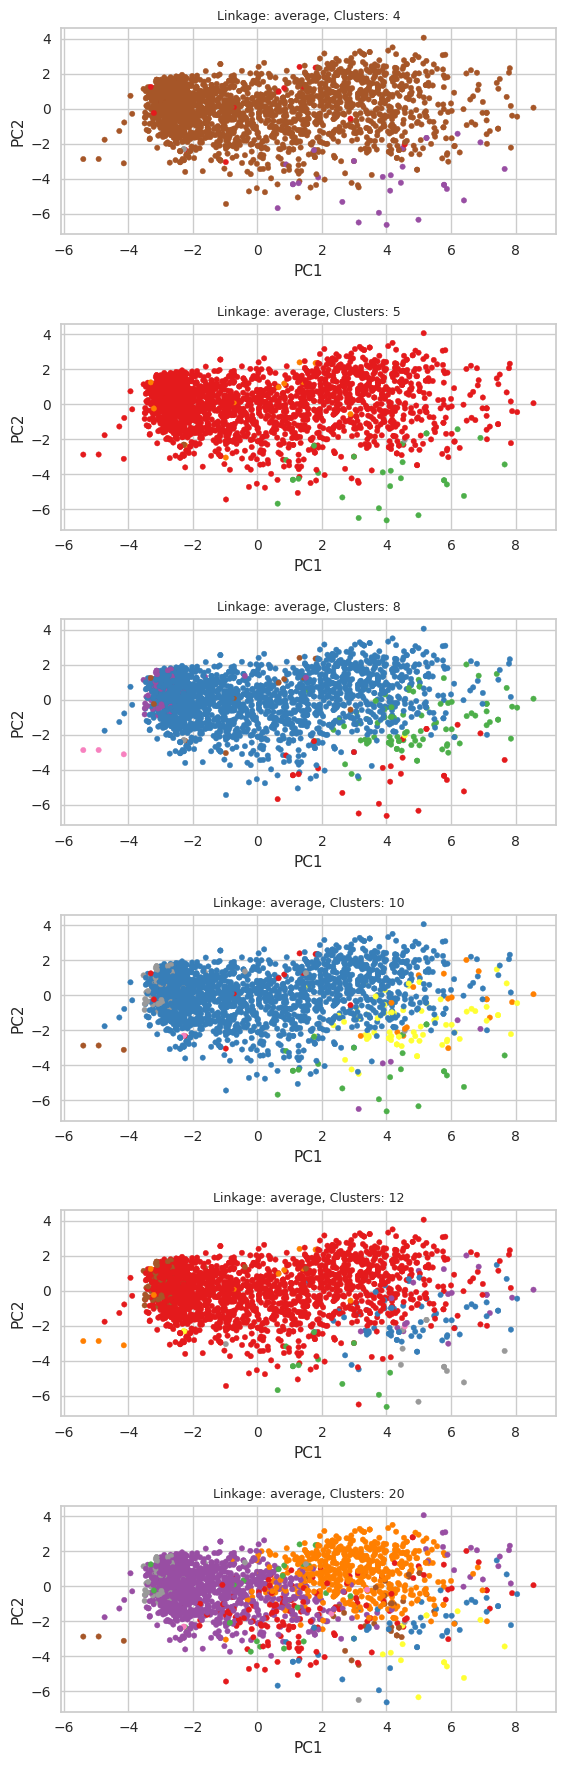

In [116]:
# Define parameters
linkage = 'average'  # Change to 'single' or 'average' if needed
n_clusters_list = [4, 5, 8, 10, 12, 20]

# Create subplots
n_rows = len(n_clusters_list)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(6, 3 * n_rows))

# Loop through cluster counts
for ax, n_clust in zip(axes, n_clusters_list):
    try:
        model = cluster.AgglomerativeClustering(
            n_clusters=n_clust,
            linkage=linkage,
        )
        labels = model.fit_predict(data_pca)

        ax.scatter(
            data_pca.iloc[:, 0],  # PC1
            data_pca.iloc[:, 1],  # PC2
            c=labels,
            cmap='Set1',
            s=15
        )
        ax.set_title(f"Linkage: {linkage}, Clusters: {n_clust}", fontsize=9)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
    except Exception as e:
        ax.set_title(f"Error: {e}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


**For the average linkage method, the number of data-points in different clusters balances as the number of clusters increases. The clusters still overlap with each other, they are not clearly separated!!**

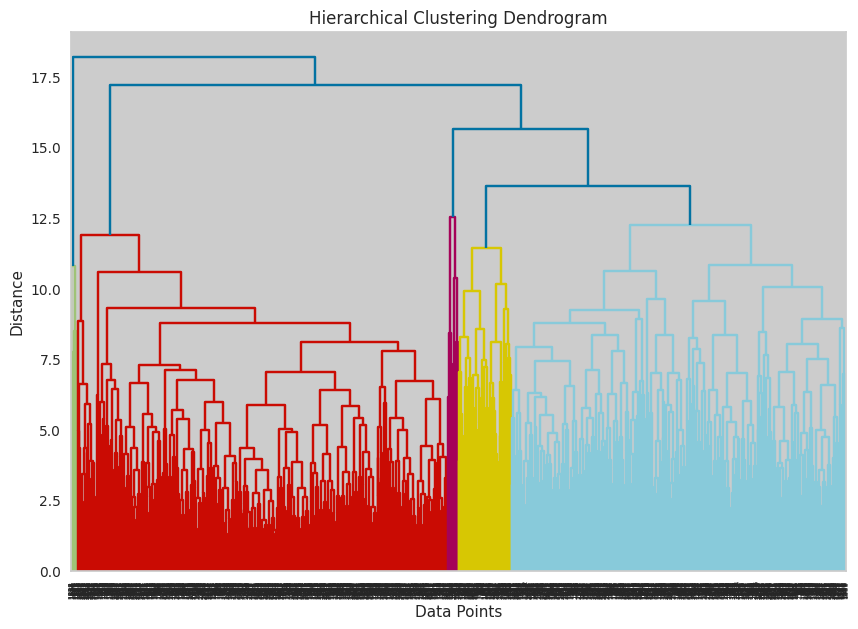

In [117]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchy.linkage(data_pca, method='complete'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

OF all the three linkage method, the complete method is looks promising due to:

- **Tall merges** (high on the y-axis) indicate significant differences between clusters.
- A **clear jump** in linkage distances toward the top suggests a good cut-off point for the number of clusters.
- Can help determine the **optimal number of clusters** visually (e.g., by horizontal cutting across a large vertical gap).

- In this case cutting it at distance 13 will produce about 5 clear custers.


In [122]:

# Define parameters
linkage = 'complete'  # Change to 'single' or 'average' if needed
n_clusters_list = [4, 5, 8, 10, 12, 20]

# Create subplots
n_rows = len(n_clusters_list)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(6, 3 * n_rows))

# Loop through cluster counts
for ax, n_clust in zip(axes, n_clusters_list):
    try:
        model = cluster.AgglomerativeClustering(
            n_clusters=n_clust,
            linkage=linkage,
        )
        labels = model.fit_predict(data_pca)

        ax.scatter(
            data_pca.iloc[:, 0],  # PC1
            data_pca.iloc[:, 1],  # PC2
            c=labels,
            cmap='Set1',
            s=15
        )
        ax.set_title(f"Linkage: {linkage}, Clusters: {n_clust}", fontsize=9)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
    except Exception as e:
        ax.set_title(f"Error: {e}", fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()


### Hierarchical Clustering (Complete Linkage)

This figures illustrates agglomerative hierarchical clustering using the **complete linkage** method on PCA-reduced data, evaluated at different cluster counts:

- **Clusters = 4 & 5**: Clear macro-group separation is visible. The data divides into large, dense regions, but some finer structure is lost. The clear marcro group is in line with what we saw in the dendrogram
- **Clusters = 8 & 10**: More granular patterns begin to emerge, capturing sub-regions in the distribution while maintaining general separation.
- **Clusters = 12 & 20**: Clusters become more compact and dispersed. Some overlap suggests potential over-fragmentation, where distinct groups start blending.




### Evaluation of Highrachial cluster for the scaled data

In [123]:
silhouettes=[]
dbi_scores= []

# Set desired number of clusters and linkage method

linkage_method = 'complete'  # You can change this to 'single', 'average', etc.


#Distance matrix for the scaled data
# Compute Gower distance matrix
distance_matrix = gower.gower_matrix(data_sc)

for k in range(2,11):
    model = cluster.AgglomerativeClustering(
    n_clusters=k,
    linkage=linkage_method,
    metric='precomputed'
    ) 
    cluster_assignments = model.fit_predict(distance_matrix) 
    silhouettes.append(silhouette_score(distance_matrix,cluster_assignments))
    dbi_scores.append(davies_bouldin_score(distance_matrix,cluster_assignments))

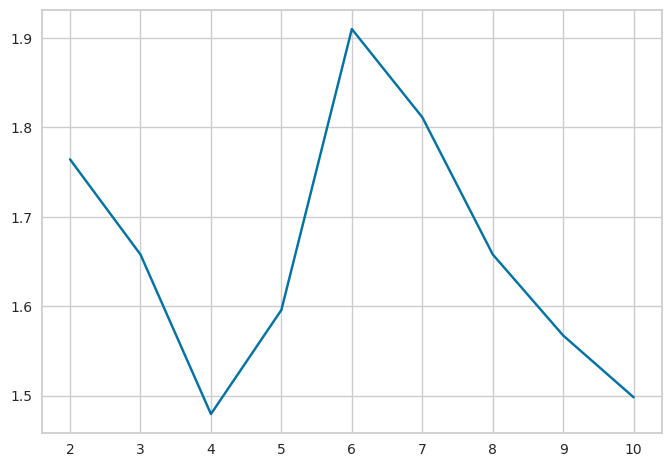

In [124]:
plt.plot(range(2,11), dbi_scores)# Plot dbi scores for HAC clustering on scaled data

In [125]:
dbi_scores_1 = []
silhouettes_1=[]
for k in range(2,11):
    model_1= cluster.AgglomerativeClustering(
    n_clusters=k,
    linkage="complete",
    ) 
    cluster_assignments_1 = model_1.fit_predict(data_pca) 
    silhouettes_1.append(silhouette_score(data_pca,cluster_assignments_1))
    dbi_scores_1.append(davies_bouldin_score(data_pca,cluster_assignments_1))

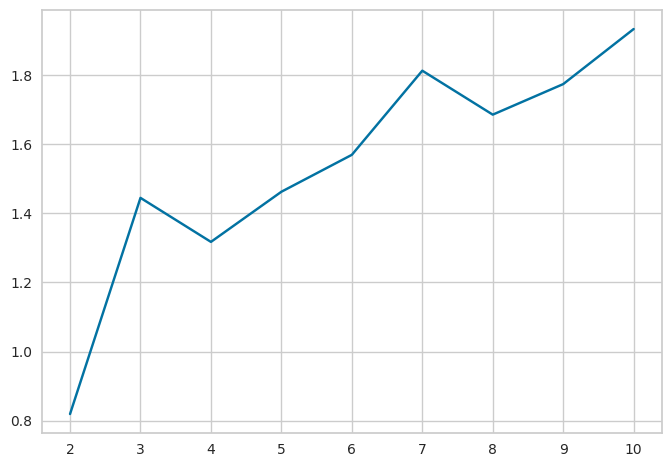

In [126]:
plt.plot(range(2,11),  dbi_scores_1)

### **The DBI scores (1.3) of 4 clusters seems to be the best that can be gotten from this dataset**

In [129]:
# Define parameters
linkage = 'complete'  # Linkage method
n_clusters = 4 # Only one value now

# Fit HAC model on PCA-reduced data
model = cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage
)

labels_pca = model.fit_predict(data_pca)

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(
    data_pca.iloc[:, 0],  # PC1
    data_pca.iloc[:, 1],  # PC2
    c=labels_pca,
    cmap='Set1',
    s=15
)
plt.title(f"HAC Clustering on PCA Data (Linkage: {linkage}, Clusters: {n_clusters})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


### **Even though the DBI score indicates a weak cluster, the visualization shows a clear separate groups of four clusters, and would be beneficial to the clustering of the customer dataset.**

In [130]:
# Add cluster labels to the original data
clustered_data = data.copy()
clustered_data['Cluster'] = labels_pca

In [131]:
# Summarize mean values per cluster
cluster_summary = clustered_data.groupby('Cluster').median(numeric_only=True)
cluster_summary

Income  Recency  MntWines  MntFruits  MntMeatProducts  \
Cluster                                                           
0        67424.5     50.0     483.0       28.0            221.5   
1        70896.5     52.5    1044.5       15.0            136.5   
2        34838.0     49.0      23.0        3.0             15.0   
3        39341.0     48.5      34.0        6.0             32.5   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0                   45.0              31.0          48.5                2.0   
1                   27.5              15.5          46.0                1.0   
2                    4.0               3.0          11.0                2.0   
3                    6.5               4.5          13.5                2.0   

         NumWebPurchases  ...   Age  Edu_Master  Edu_PhD  Edu_Undergraduate  \
Cluster                   ...                                                 
0                    5.0  ...  58.5         0.0      0.0                1.0   
1                    5.0  ...  56.5         0.0      0.0                1.0   
2                    2.0  ...  53.0         0.0      0.0                1.0   
3                    3.0  ...  55.0         0.0      0.0                1.0   

         Edu_high_school  Mar_Single  Mar_Together  Seniority  Children  \
Cluster                                                                   
0                    0.0         0.0           1.0      146.0       1.0   
1                    0.0         0.0           1.0      145.0       0.0   
2                    0.0         0.0           1.0      142.0       1.0   
3                    0.0         0.0           1.0      149.5       1.0   

         Total_Spending  
Cluster                  
0                1017.5  
1                1375.0  
2                  68.0  
3                  95.5  

[4 rows x 30 columns]

In [132]:
sns.boxplot(data=clustered_data, x='Cluster', y='Total_Spending')

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='Total_Spending'>

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='Income'>

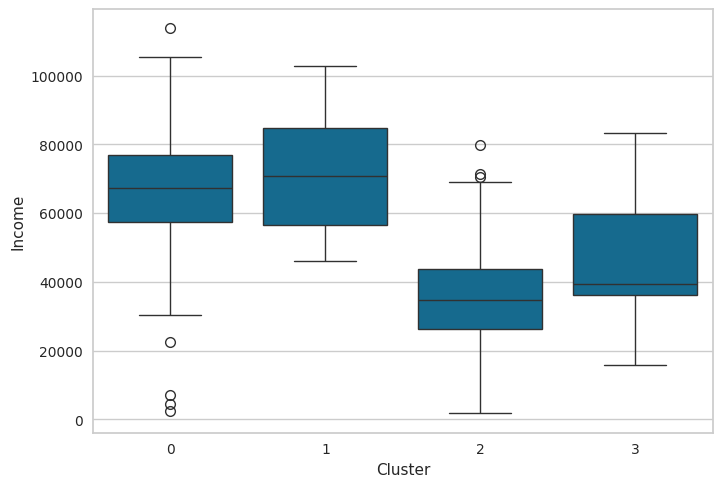

In [133]:
sns.boxplot(data=clustered_data, x='Cluster', y='Income')

In [134]:
sns.boxplot(data=clustered_data, x='Cluster', y='NumWebVisitsMonth')

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='NumWebVisitsMonth'>

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='NumStorePurchases'>

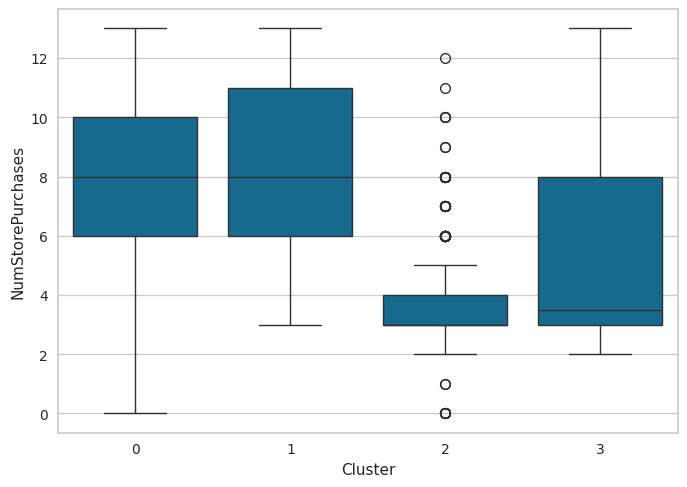

In [135]:
sns.boxplot(data=clustered_data, x='Cluster', y='NumStorePurchases')

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='MntGoldProds'>

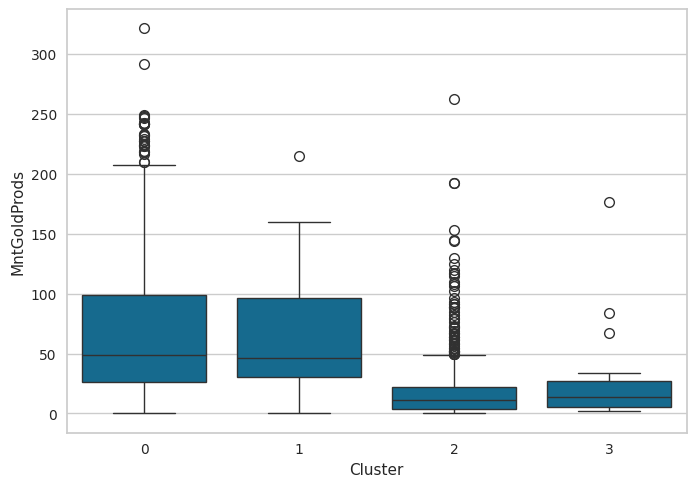

In [136]:
sns.boxplot(data=clustered_data, x='Cluster', y='MntGoldProds')

[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[scatterd] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Cluster', ylabel='MntWines'>

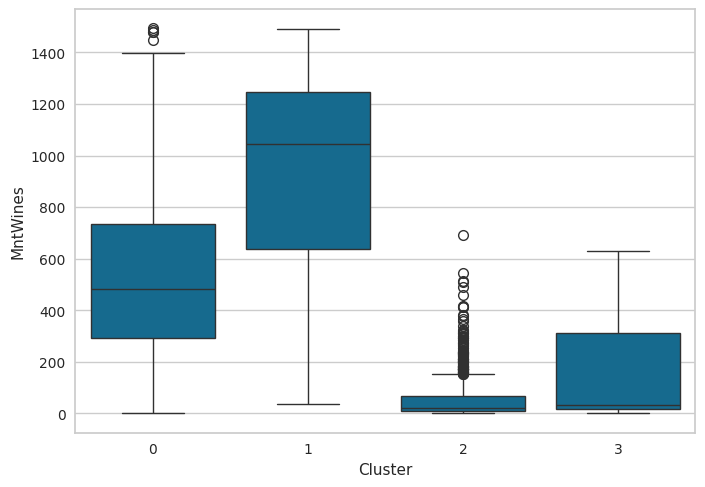

In [137]:
sns.boxplot(data=clustered_data, x='Cluster', y='MntWines')

### Cluster-wise Feature Summary

| Cluster | Income (Med) | Total Spending (Med) | Wine Spending (Med) | Gold Spending (Med) | NumWebVisitsMonth |NumStorePurchases | General Traits |    
|---------|--------------|---------|---------|-------|------|-------|------------------------------------------|
| 0       | ~70,000      | ~1,000  | ~500    | ~48.5 |   4  |  8    | Middle-to-high income, moderate spending, Prefer in-store purchase   |
| 1       | ~75,000      | ~1,400  | ~1,050  |  ~46.5|   4.5|  8    | High income, high spenders, Prefer in-store purchase  |
| 2       | ~35,000      | ~100    | ~50     |  ~11  |   7  |  3    | Low income, minimal spenders, candidates for targeted online Ads |
| 3       | ~40,000      | ~250    | ~100    |   ~13 |   7  |  3.5| Low-to-mid income, low spenders, candidates for targeted online Ads |


### Cluster Interpretation

| Cluster | Description                                                                              |
|---------|------------------------------------------------------------------------------------------|
| 0       | Moderate-income, balanced spenders: Value-oriented customers with moderate wine interest.|
| 1       | High-income, high spenders: Premium segment, ideal for luxury products and loyalty perks.|
| 2       | Low-income, minimal spenders: Cost-sensitive group; may respond to discounts or bundles. |
| 3       | Mid-low income, cautious spenders: Conservative spenders, potential for targeted upselling.|
